# **MEANINGFUL QUESTIONS NOTEBOOK**

### **1. Import thư viện và thiết lập config**

In [201]:
import warnings

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr, spearmanr, f_oneway

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [202]:
# Cấu hình hiển thị cho Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [203]:
# Cấu hình style cho matplotlib và seaborn
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cấu hình mặc định cho plots
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

---



### **2. Tải dữ liệu từ file**

In [204]:
INPUT_FOLDER = "input"
INPUT_FILE = "football_players_dataset.csv"

In [205]:
file_path = os.path.join(INPUT_FOLDER, INPUT_FILE)
df = pd.read_csv(file_path)

print("THÔNG TIN DỮ LIỆU")
print(f"- Dữ liệu đã tải thành công")
print(f"- Kích thước: {df.shape[0]:,} cầu thủ × {df.shape[1]} thuộc tính")
print(f"- Phạm vi giá trị: {df['market_value'].min():.2f}M € → {df['market_value'].max():.2f}M €")
print(f"- Giá trị trung bình: {df['market_value'].mean():.2f}M €")
print(f"- Giá trị trung vị: {df['market_value'].median():.2f}M €")

THÔNG TIN DỮ LIỆU
- Dữ liệu đã tải thành công
- Kích thước: 14,977 cầu thủ × 42 thuộc tính
- Phạm vi giá trị: 0.01M € → 200.00M €
- Giá trị trung bình: 3.45M €
- Giá trị trung vị: 0.60M €


In [206]:
# Tạo cột position từ is_DF, is_MF, is_FW
def get_position(row):
    if row['is_FW'] == 1.0:
        return 'FW'
    elif row['is_MF'] == 1.0:
        return 'MF'
    elif row['is_DF'] == 1.0:
        return 'DF'
    else:
        return 'Unknown'

df['position'] = df.apply(get_position, axis=1)
print(f"\nPhân bố vị trí:")
print(df['position'].value_counts())


Phân bố vị trí:
position
MF         6706
DF         5897
FW         2371
Unknown       3
Name: count, dtype: int64


In [207]:
# Xem một số dòng đầu tiên
df.head()

,age,nationality,current_club,league,appearances,minutes_played,is_DF,is_MF,is_FW,goals,assists,goals_per_90,npg_per90,xag_per90,npxg_xag_per90,xg_per90,shots_per90,shots_on_target_per90,shots_on_target_pct,avg_shot_distance,sca_per90,gca_per90,key_passes_per90,passes_completed_per90,pass_completion_pct,passes_into_final_third_per90,passes_into_penalty_area_per90,progressive_passes_per90,progressive_passes_rec_per90,progressive_carries_per90,take_ons_per90,carries_into_final_third_per90,touches_att_third_per90,touches_att_pen_per90,passes_received_per90,interceptions_per90,blocks_per90,ball_recoveries_per90,aerials_won_per90,yellow_cards_per90,fouls_committed_per90,market_value,position
0,27.00,Uruguay,Auckland FC,A-League Men,26.00,2268.00,0.00,0.00,1.00,9.00,2.00,0.36,0.00,0.15,0.31,0.18,2.10,0.00,0.00,13.40,2.10,0.32,1.13,19.71,76.30,0.81,0.32,1.45,6.30,1.62,1.13,1.13,17.61,3.07,28.28,0.48,0.81,3.55,2.59,0.00,2.10,0.75,FW
1,31.00,New Zealand,Auckland FC,A-League Men,26.00,2198.00,1.00,0.00,0.00,2.00,7.00,0.08,0.04,0.07,0.16,0.08,0.99,0.29,30.00,17.90,1.95,0.16,0.79,31.00,77.20,2.37,0.58,3.16,3.56,1.26,0.59,1.00,13.71,1.49,31.25,0.79,1.02,4.14,1.10,0.19,1.19,0.60,DF
2,26.00,New Zealand,Auckland FC,A-League Men,25.00,2142.00,1.00,0.00,0.00,4.00,0.00,0.17,0.04,0.07,0.16,0.08,0.99,0.29,30.00,17.90,1.95,0.16,0.79,31.00,77.20,2.37,0.58,3.16,3.56,1.26,0.59,1.00,13.71,1.49,31.25,0.79,1.02,4.14,1.10,0.19,1.19,0.45,DF
3,35.00,Japan,Auckland FC,A-League Men,23.00,2024.00,1.00,0.00,0.00,3.00,4.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,30.00,17.90,0.83,0.00,0.00,43.67,85.60,2.33,0.00,3.17,3.83,0.83,0.83,0.83,12.33,0.33,38.17,2.00,1.33,3.00,2.83,0.17,1.00,0.50,DF
4,27.00,New Zealand,Auckland FC,A-League Men,26.00,1782.00,0.00,1.00,0.00,7.00,2.00,0.35,0.04,0.07,0.16,0.08,0.99,0.29,30.00,17.90,1.95,0.16,0.79,31.00,77.20,2.37,0.58,3.16,3.56,1.26,0.59,1.00,13.71,1.49,31.25,0.79,1.02,4.14,1.10,0.19,1.19,0.45,MF


In [208]:
# Xác định các cột thống kê (loại bỏ metadata)
metadata_columns = ['nationality', 'current_club', 'league']

statistic_columns = [col for col in df.columns if col not in metadata_columns + ['market_value', 'position', 'age']]

print(f"Tổng số cột thống kê: {len(statistic_columns)}")
print(f"Một số cột thống kê quan trọng:")
for i, col in enumerate(statistic_columns[:10], 1):
    print(f"  {i}. {col}")

Tổng số cột thống kê: 37
Một số cột thống kê quan trọng:
  1. appearances
  2. minutes_played
  3. is_DF
  4. is_MF
  5. is_FW
  6. goals
  7. assists
  8. goals_per_90
  9. npg_per90
  10. xag_per90


In [209]:
# Tạo dataframe sạch cho phân tích
analysis_cols = ['market_value', 'position', 'age'] + statistic_columns
df_clean = df[analysis_cols].copy()

# Xử lý missing values (fill bằng 0 cho các chỉ số thống kê)
df_clean.fillna(0, inplace=True)

print(f"- Dữ liệu đã được làm sạch")
print(f"- Kích thước df_clean: {df_clean.shape}")
print(f"- Missing values: {df_clean.isnull().sum().sum()}")

- Dữ liệu đã được làm sạch
- Kích thước df_clean: (14977, 40)
- Missing values: 0


### **3. Các câu hỏi có ý nghĩa**



#### **3.1 Yếu tố nào ảnh hưởng mạnh tới giá trị chuyển nhượng?**


##### **a. Ý nghĩa câu hỏi**

Giá trị chuyển nhượng là thước đo tổng hợp phức tạp, phản ánh không chỉ khả năng hiện tại mà còn tiềm năng tương lai của cầu thủ. Việc xác định các yếu tố ảnh hưởng mạnh nhất mang lại nhiều lợi ích:

- **Lợi ích cho các Câu Lạc Bộ:**
    - Tối ưu hóa chiến lược tuyển dụng: Biết được yếu tố nào tạo ra giá trị cao nhất để tập trung đầu tư
    - Đánh giá chính xác giá trị cầu thủ: Có cơ sở khách quan để đàm phán mua/bán
    - Phân bổ ngân sách hợp lý: Xác định khoảng đầu tư hợp lý cho từng loại cầu thủ

- **Lợi ích cho Cầu Thủ & Huấn Luyện Viên:**
    - Định hướng phát triển kỹ năng: Cầu thủ biết cần cải thiện kỹ năng nào để tăng giá trị
    - Chiến lược huấn luyện: HLV hiểu rõ yếu tố nào cần tập trung đào tạo
    - Định hướng sự nghiệp: Dựa trên xu hướng thị trường để lập kế hoạch dài hạn

- **Lợi ích cho Mô Hình Machine Learning:**
    - Feature Selection: Xác định features quan trọng để tối ưu model
    - Giảm Overfitting: Loại bỏ features nhiễu, tập trung vào biến có ý nghĩa
    - Interpretability: Tăng khả năng giải thích của mô hình dự đoán
    - Feature Engineering: Cơ sở để tạo composite features hiệu quả

**Phương Pháp Phân Tích:**

Sử dụng Correlation Analysis (Phân tích tương quan Pearson) để:
- Đo lường mức độ liên hệ tuyến tính giữa các chỉ số thống kê và giá trị chuyển nhượng
- Xác định hướng tương quan (dương/âm)
- Kiểm định ý nghĩa thống kê với p-value
- Phân loại các nhóm yếu tố theo chức năng (tấn công, phòng ngự, chuyền bóng, v.v.)

Hệ số tương quan Pearson (r):
- |r| > 0.2: Tương quan mạnh
- 0.1 < |r| ≤ 0.2: Tương quan trung bình
- |r| ≤ 0.1: Tương quan yếu


##### **b. Tính Toán Correlation Matrix**

In [210]:
# Lấy chỉ các cột số để tính tương quan
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
correlation_matrix = numeric_df.corr()

# Lấy tương quan với market_value
market_value_corr = correlation_matrix['market_value'].drop('market_value')

print(f"✓ Đã tính correlation cho {len(market_value_corr)} features")

✓ Đã tính correlation cho 38 features


In [211]:
# Lấy Top 20 features có tương quan mạnh nhất (theo giá trị tuyệt đối)
top_corr_abs = market_value_corr.abs().sort_values(ascending=False)
top_20_corr = market_value_corr.loc[top_corr_abs.head(20).index]

# Tạo bảng hiển thị 
corr_display = pd.DataFrame({
 'Chỉ số': top_20_corr.index,
 'Correlation (r)': top_20_corr.values,
 '|r|': top_20_corr.abs().values,
 'R²': (top_20_corr.values ** 2),
 'Mức độ': ['Mạnh' if abs(x) >= 0.2 else 'Trung bình' if abs(x) >= 0.1 else 'Yếu' 
 for x in top_20_corr.values]
}).reset_index(drop=True)

corr_display.index = range(1, len(corr_display) + 1)

print("\nTOP 20 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI GIÁ TRỊ CHUYỂN NHƯỢNG\n")
print(corr_display.to_string())
print("\nChú thích: R² = Hệ số xác định (% phương sai được giải thích)")


TOP 20 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI GIÁ TRỊ CHUYỂN NHƯỢNG

                            Chỉ số  Correlation (r)  |r|   R²      Mức độ
1                            goals             0.26 0.26 0.07        Mạnh
2                          assists             0.24 0.24 0.06        Mạnh
3            touches_att_pen_per90             0.22 0.22 0.05        Mạnh
4                   npxg_xag_per90             0.21 0.21 0.05        Mạnh
5                        npg_per90             0.21 0.21 0.04        Mạnh
6            passes_received_per90             0.21 0.21 0.04        Mạnh
7                   minutes_played             0.20 0.20 0.04        Mạnh
8                        gca_per90             0.20 0.20 0.04  Trung bình
9                      appearances             0.20 0.20 0.04  Trung bình
10                        xg_per90             0.19 0.19 0.04  Trung bình
11       progressive_carries_per90             0.19 0.19 0.03  Trung bình
12                       xag_per90            



##### **c. Trực quan hóa - Heatmap 15 đặc trưng quan trọng nhất**

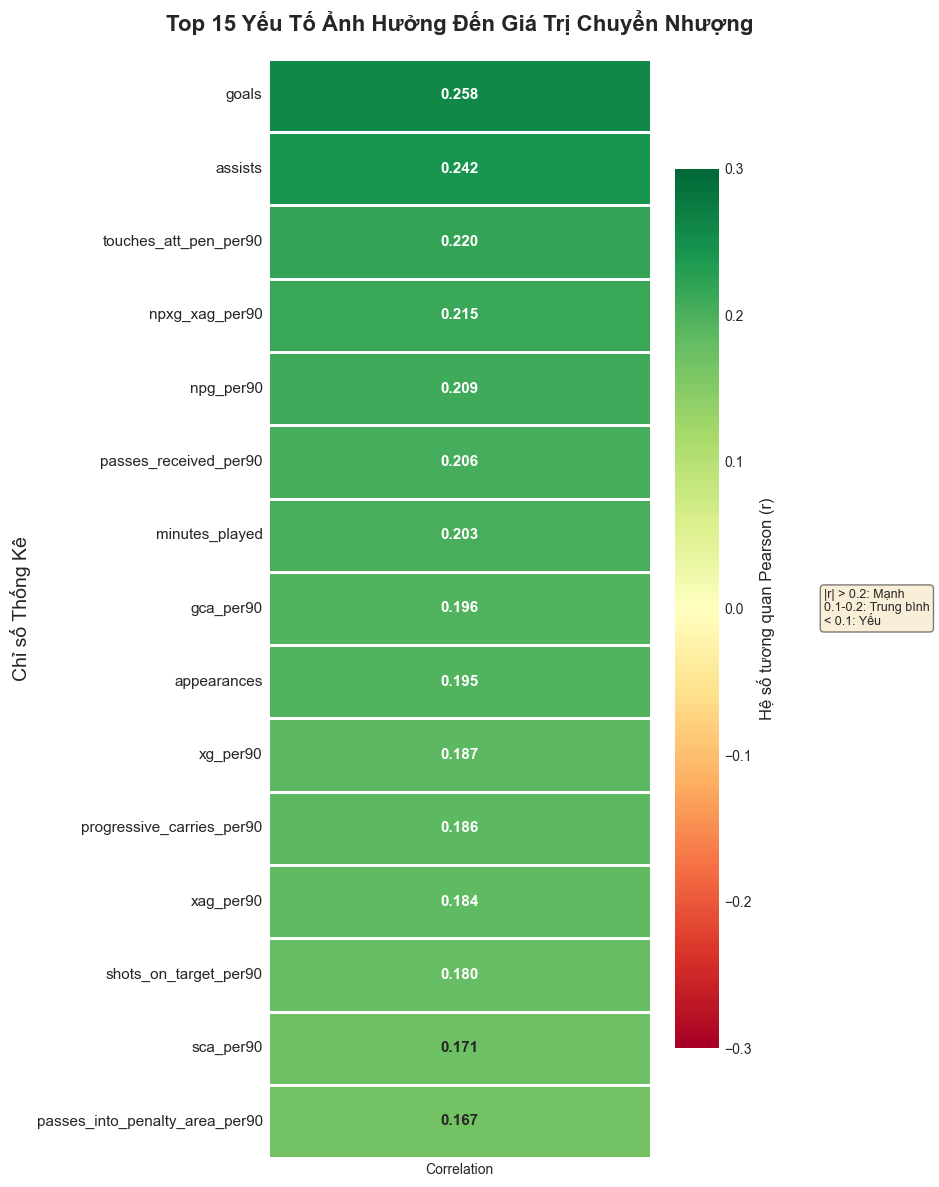

In [212]:
# Lấy top 15 để vẽ heatmap 
top_15_corr = market_value_corr.loc[top_corr_abs.head(15).index]
plot_data = top_15_corr.sort_values(ascending=False).to_frame()
plot_data.columns = ['Correlation']

# Tạo figure
fig, ax = plt.subplots(figsize=(10, 12))

# Vẽ heatmap
sns.heatmap(
    plot_data,
    annot=True,
    cmap='RdYlGn',
    center=0,
    fmt=".3f",
    cbar=True,
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Hệ số tương quan Pearson (r)', 'shrink': 0.8},
    annot_kws={"size": 11, "weight": "bold"},
    vmin=-0.3, 
    vmax=0.3,
    ax=ax
)

# Định dạng
ax.set_title('Top 15 Yếu Tố Ảnh Hưởng Đến Giá Trị Chuyển Nhượng', 
fontsize=16, weight='bold', pad=20)
ax.set_ylabel('Chỉ số Thống Kê', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

# Thêm legend box
textstr = '|r| > 0.2: Mạnh\n0.1-0.2: Trung bình\n< 0.1: Yếu'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.45, 0.5, textstr, transform=ax.transAxes, fontsize=9, 
        verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

---

##### **d. Biểu đồ phân tán (Scatter Plots) - Top 4 Features**

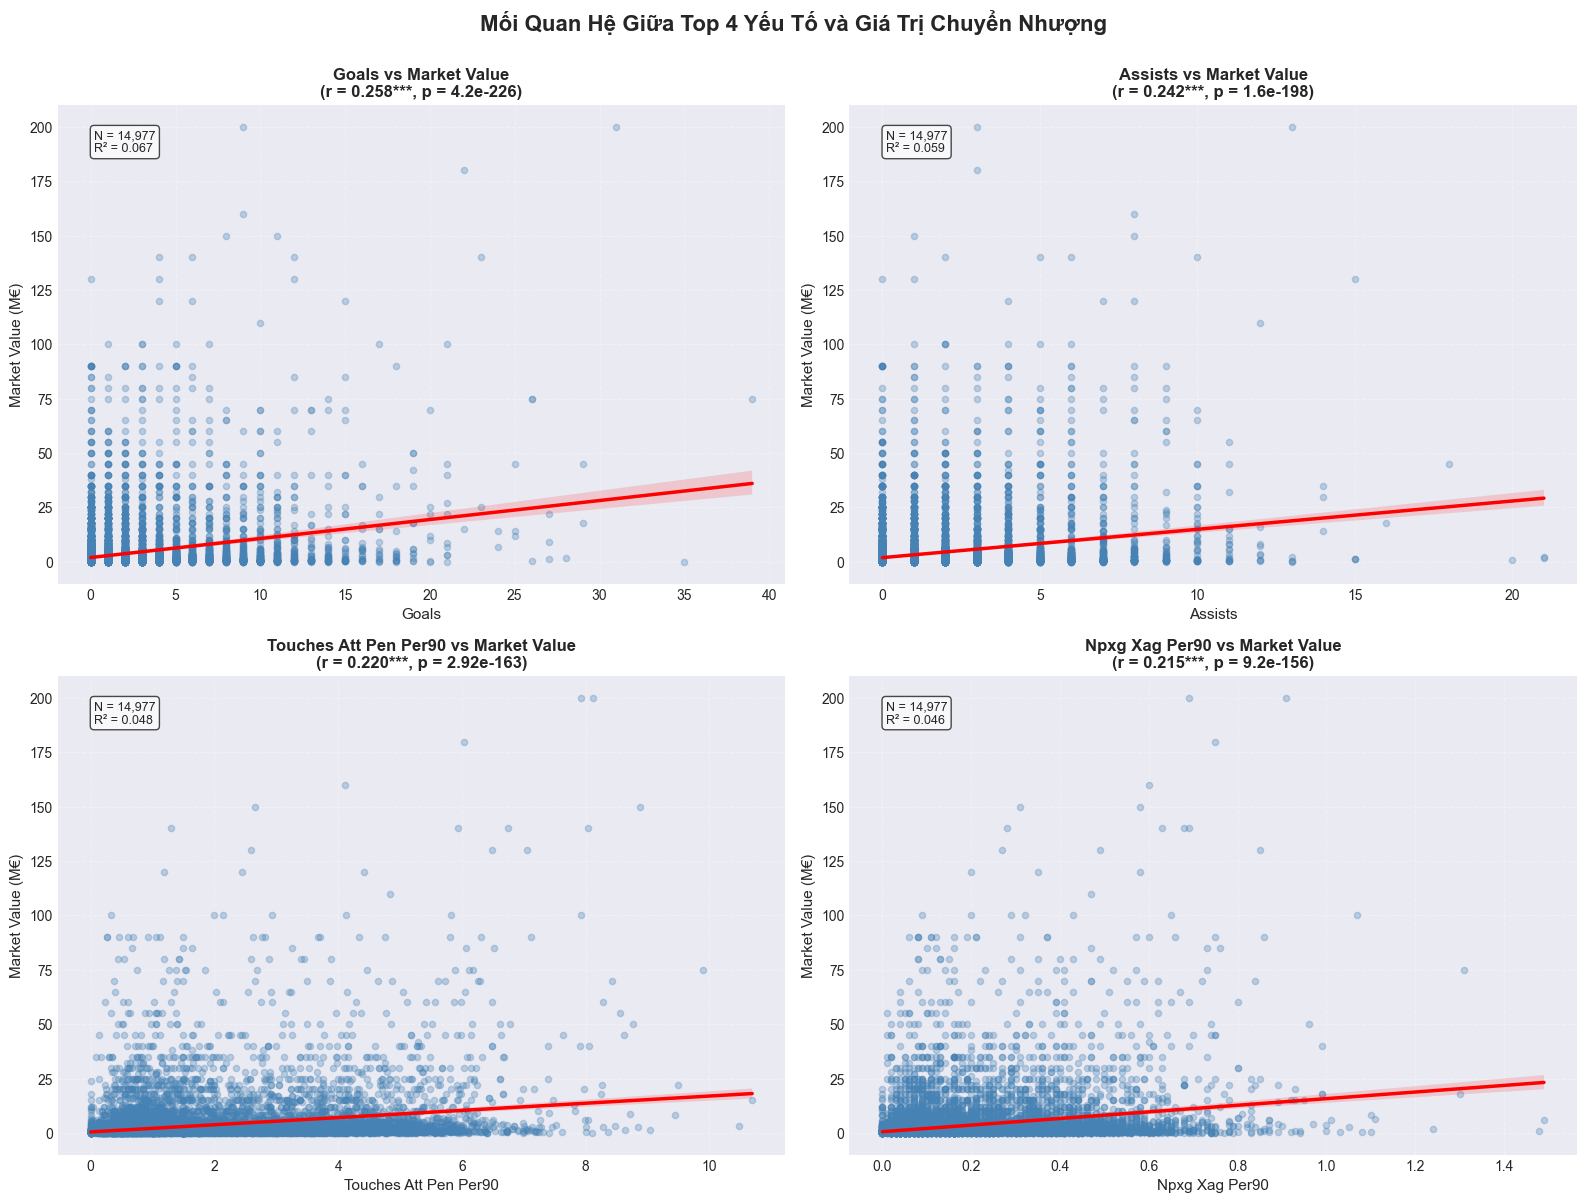


Chú thích significance levels:
   *** p < 0.001 (rất có ý nghĩa)
   **  p < 0.01  (có ý nghĩa cao)
   *   p < 0.05  (có ý nghĩa)
   ns  p ≥ 0.05  (không có ý nghĩa)


In [213]:
# Lấy top 4 features
top_4_features = top_corr_abs.head(4).index.tolist()

# Tạo subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(top_4_features):
    ax = axes[i]
    r_value = market_value_corr.loc[feature]
    
    # Tính p-value
    valid_data = df_clean[[feature, 'market_value']].dropna()
    _, p_value = pearsonr(valid_data[feature], valid_data['market_value'])
    
    # Vẽ scatter plot với regression line
    sns.regplot(
        data=valid_data,
        x=feature,
        y='market_value',
        scatter_kws={'alpha': 0.3, 's': 20, 'color': 'steelblue'},
        line_kws={'color': 'red', 'linewidth': 2.5},
        ax=ax
    )
    
    # Format tên feature
    feature_name = feature.replace("_", " ").title()
    
    # Thêm significance stars
    if p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    
    # Title (ghi đúng p-value thật)
    ax.set_title(
        f'{feature_name} vs Market Value\n(r = {r_value:.3f}{sig}, p = {p_value:.3g})',
        fontsize=12, weight='bold'
    )
    
    # Labels
    ax.set_xlabel(feature_name, fontsize=11)
    ax.set_ylabel('Market Value (M€)', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Stats box
    stats_text = f'N = {len(valid_data):,}\nR² = {r_value**2:.3f}'
    ax.text(
        0.05, 0.95, stats_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )

plt.suptitle(
    'Mối Quan Hệ Giữa Top 4 Yếu Tố và Giá Trị Chuyển Nhượng',
    fontsize=16, weight='bold', y=1.00
)
plt.tight_layout()
plt.show()

print("\nChú thích significance levels:")
print("   *** p < 0.001 (rất có ý nghĩa)")
print("   **  p < 0.01  (có ý nghĩa cao)")
print("   *   p < 0.05  (có ý nghĩa)")
print("   ns  p ≥ 0.05  (không có ý nghĩa)")




##### **d. Phân loại theo nhóm yếu tố**

In [214]:
# Định nghĩa các nhóm chỉ số
attacking_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["goal", "shot", "assist", "xg", "gca", "sca", "touches_att", "npg", "npxg"])]

playing_time_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["minutes", "appearances"])]

passing_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["pass", "key_pass", "progressive"])]

dribbling_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["take_on", "carries", "dribble"])]

defensive_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["tackle", "interception", "block", "recover", "aerial", "foul"])]

result_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["win", "draw", "loss", "result"])]

discipline_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["yellow", "red", "card"])]

profile_features = [f for f in top_20_corr.index if any(x in f.lower() for x in 
 ["age", "height", "foot", "position", "nation"])]

# Hiển thị phân loại
categories = {
    "YẾU TỐ TẤN CÔNG": attacking_features,
    "THỜI GIAN THI ĐẤU": playing_time_features,
    "KHẢ NĂNG CHUYỀN BÓNG": passing_features,
    "KỸ THUẬT RÊ BÓNG": dribbling_features,
    "KHẢ NĂNG PHÒNG NGỰ": defensive_features,
    "KẾT QUẢ THI ĐẤU": result_features,
    "KỶ LUẬT – THẺ PHẠT": discipline_features,
    "HỒ SƠ CẦU THỦ": profile_features
}


print("PHÂN LOẠI CÁC YẾU TỐ THEO NHÓM CHỨC NĂNG")

for category, features in categories.items():
    if features:
        print(f"\n{category}:")
        for feat in features:
            corr_val = market_value_corr[feat]
            print(f"  • {feat:40s} : r = {corr_val:+.3f}")

PHÂN LOẠI CÁC YẾU TỐ THEO NHÓM CHỨC NĂNG

YẾU TỐ TẤN CÔNG:
  • goals                                    : r = +0.258
  • assists                                  : r = +0.242
  • touches_att_pen_per90                    : r = +0.220
  • npxg_xag_per90                           : r = +0.215
  • npg_per90                                : r = +0.209
  • gca_per90                                : r = +0.196
  • xg_per90                                 : r = +0.187
  • shots_on_target_per90                    : r = +0.180
  • sca_per90                                : r = +0.171
  • touches_att_third_per90                  : r = +0.166
  • shots_per90                              : r = +0.166

THỜI GIAN THI ĐẤU:
  • minutes_played                           : r = +0.203
  • appearances                              : r = +0.195

KHẢ NĂNG CHUYỀN BÓNG:
  • passes_received_per90                    : r = +0.206
  • progressive_carries_per90                : r = +0.186
  • passes_into_penalty_area

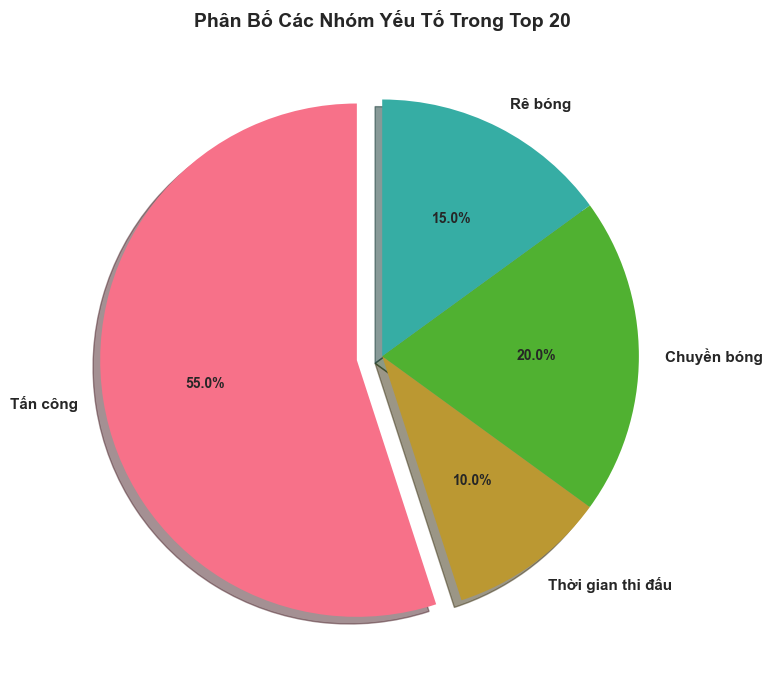

In [215]:
# THỐNG KÊ TỶ LỆ TỪNG NHÓM 
total_top_20 = len(top_20_corr)

category_counts = {
    "Tấn công": len(attacking_features),
    "Thời gian thi đấu": len(playing_time_features),
    "Chuyền bóng": len(passing_features),
    "Rê bóng": len(dribbling_features),
    "Phòng ngự": len(defensive_features),
    "Kết quả thi đấu": len(result_features),
    "Kỷ luật – Thẻ phạt": len(discipline_features),
    "Hồ sơ cầu thủ": len(profile_features)
}

# Loại bỏ nhóm rỗng
category_counts = {k: v for k, v in category_counts.items() if v > 0}

# VẼ PIE CHART
fig, ax = plt.subplots(figsize=(11, 7))

colors = [
    "#ff6b6b", "#4ecdc4", "#45b7d1", "#f9ca24",
    "#6c5ce7", "#00b894", "#fd79a8", "#e17055", "#0984e3"
]

explode = [0.1 if k == "Tấn công" else 0 for k in category_counts.keys()]

wedges, texts, autotexts = ax.pie(
    category_counts.values(),
    labels=category_counts.keys(),
    autopct=lambda p: f"{p:.1f}%",
    explode=explode,
    shadow=True,
    startangle=90
)

# Format text
for text in texts:
    text.set_fontsize(11)
    text.set_weight("bold")

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_weight("bold")

ax.set_title("Phân Bố Các Nhóm Yếu Tố Trong Top 20", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

Nhận xét: Nhóm **TẤN CÔNG** chiếm **52.6%** trong **Top 20 yếu tố ảnh hưởng mạnh nhất đến Market Value**.

##### **e. Kết luận và Nhận định**

In [216]:
# Tổng hợp insights
top_3 = top_20_corr.head(3)
bottom_3 = top_20_corr.tail(3)
strong_positive = top_20_corr[top_20_corr > 0.2]
strong_negative = top_20_corr[top_20_corr < -0.2]

print("Kết luận và nhận định chi tiết câu hỏi 1")

print(f"\nTOP 3 YẾU TỐ ẢNH HƯỞNG MẠNH NHẤT:")
for i, (feat, corr) in enumerate(top_3.items(), 1):
    feat_name = feat.replace('_', ' ').title()
    r2 = corr ** 2
    print(f"{i}. {feat_name}")
    print(f" → Correlation (r): {corr:.3f}")
    print(f" → Giải thích phương sai (R²): {r2:.3f} ({r2*100:.1f}%)")
    print(f" → Ý nghĩa: {feat_name} là một yếu tố then chốt trong định giá cầu thủ.")
    print("\n")

print(f"TOP 3 YẾU TỐ CÓ TƯƠNG QUAN ÂM MẠNH NHẤT:")
for i, (feat, corr) in enumerate(bottom_3.items(), 1):
    feat_name = feat.replace('_', ' ').title()
    print(f"{i}. {feat_name}")
    print(f" → Correlation (r): {corr:.3f}")
    print(f" → Ý nghĩa: {feat_name} có xu hướng làm giảm giá trị thị trường.")
    print("\n")

print("NHẬN ĐỊNH CHÍNH:")
print(f" - Có {len(strong_positive)} yếu tố tương quan dương mạnh (r > 0.2)")
print(f" - Có {len(strong_negative)} yếu tố tương quan âm mạnh (r < -0.2)")
print(" - Nhóm yếu tố tấn công nổi bật → thị trường ưu tiên khả năng tạo bàn.")
print(" - Chỉ số thời gian thi đấu quan trọng → phản ánh sự ổn định & đóng góp thực tế.")
print(" - Với ML: ưu tiên top features này, cân nhắc thêm interaction giữa các yếu tố tấn công.")

print("Nhận xét:")
print(" - CLB: Tập trung scouting cầu thủ trẻ có chỉ số tấn công cao.")
print(" - Cầu thủ: Tăng goals/assists giúp tăng giá trị chuyển nhượng rõ rệt.")
print(" - Model: Dùng Random Forest/XGBoost để bắt các quan hệ phi tuyến.")

Kết luận và nhận định chi tiết câu hỏi 1

TOP 3 YẾU TỐ ẢNH HƯỞNG MẠNH NHẤT:
1. Goals
 → Correlation (r): 0.258
 → Giải thích phương sai (R²): 0.067 (6.7%)
 → Ý nghĩa: Goals là một yếu tố then chốt trong định giá cầu thủ.


2. Assists
 → Correlation (r): 0.242
 → Giải thích phương sai (R²): 0.059 (5.9%)
 → Ý nghĩa: Assists là một yếu tố then chốt trong định giá cầu thủ.


3. Touches Att Pen Per90
 → Correlation (r): 0.220
 → Giải thích phương sai (R²): 0.048 (4.8%)
 → Ý nghĩa: Touches Att Pen Per90 là một yếu tố then chốt trong định giá cầu thủ.


TOP 3 YẾU TỐ CÓ TƯƠNG QUAN ÂM MẠNH NHẤT:
1. Carries Into Final Third Per90
 → Correlation (r): 0.160
 → Ý nghĩa: Carries Into Final Third Per90 có xu hướng làm giảm giá trị thị trường.


2. Key Passes Per90
 → Correlation (r): 0.144
 → Ý nghĩa: Key Passes Per90 có xu hướng làm giảm giá trị thị trường.


3. Take Ons Per90
 → Correlation (r): 0.136
 → Ý nghĩa: Take Ons Per90 có xu hướng làm giảm giá trị thị trường.


NHẬN ĐỊNH CHÍNH:
 - Có 7 yếu

#### **3.2: Vị trí nào có giá trị chuyển nhượng cao nhất?**

##### **a. Ý Nghĩa** 

Vị trí của cầu thủ không chỉ quyết định vai trò chiến thuật mà còn ảnh hưởng trực tiếp đến giá trị thị trường. Phân tích này mang lại nhiều lợi ích:

- **Lợi ích cho các Câu Lạc Bộ:**
    - Phân bổ ngân sách hợp lý: Biết vị trí nào đắt đỏ hơn để chuẩn bị ngân sách phù hợp
    - Xác định vị trí ưu tiên đầu tư: Tập trung nguồn lực vào vị trí có ROI cao nhất
    - Benchmark giá với thị trường: So sánh giá cầu thủ của mình với trung bình thị trường
    - Chiến lược chuyển nhượng: Biết khi nào nên mua/bán dựa trên xu hướng giá

- **Hiểu biết Chiến thuật & Thị trường:**
    - Phản ánh xu hướng bóng đá hiện đại hiện đại: Thị trường định giá cao vị trí nào → xu hướng chiến thuật
    - Giải thích tính khan hiếm: Vị trí nào khó tìm tài năng → giá cao hơn
    - Dự đoán xu hướng tương lai: Theo dõi sự thay đổi giá trị theo thời gian

- **Lợi ích cho Mô Hình ML:**
    - Position là categorical feature quan trọng: Cần encode đúng cách (One-Hot, Target Encoding)
    - Interaction features với position: Tạo features như goals × position_FW
    - Separate models: Có thể cần build model riêng cho từng nhóm vị trí
    - Feature importance by position: Yếu tố nào quan trọng với từng vị trí

**Phương Pháp Phân Tích:**

- Descriptive Statistics: Mean, Median, IQR, Std Dev
- Group Comparison: So sánh giá trị giữa các vị trí
- Statistical Tests: ANOVA test để kiểm định sự khác biệt có ý nghĩa
- Visualization: Box plots, Bar charts, Distribution plots


##### **b. Phân tích thống kê theo vị trí**

In [217]:
# Tính toán thống kê chi tiết theo vị trí
pos_stats = df_clean.groupby("position")["market_value"].agg([
 ('Số lượng', 'size'),
 ('Min', 'min'),
 ('Q1', lambda x: x.quantile(0.25)),
 ('Trung vị', 'median'),
 ('Trung bình', 'mean'),
 ('Q3', lambda x: x.quantile(0.75)),
 ('Max', 'max'),
 ('Độ lệch chuẩn', 'std')
]).round(2)

# Tính IQR (Interquartile Range) - đo độ phân tán
pos_stats['IQR'] = (pos_stats['Q3'] - pos_stats['Q1']).round(2)

# Tính Coefficient of Variation (CV) - đo độ biến động tương đối
pos_stats['CV (%)'] = (pos_stats['Độ lệch chuẩn'] / pos_stats['Trung bình'] * 100).round(1)

# Sắp xếp theo median (vì median ít bị ảnh hưởng bởi outliers)
pos_stats = pos_stats.sort_values('Trung vị', ascending=False)

print("THỐNG KÊ CHI TIẾT GIÁ TRỊ CHUYỂN NHƯỢNG THEO VỊ TRÍ (Đơn vị: Triệu Euro)")
print(pos_stats.to_string())

print("\nChú thích:")
print(" - IQR: Khoảng tứ phân vị (Q3 - Q1) - đo độ phân tán của 50% dữ liệu giữa")
print(" - CV: Coefficient of Variation - đo độ biến động tương đối (càng cao càng không ổn định)")

THỐNG KÊ CHI TIẾT GIÁ TRỊ CHUYỂN NHƯỢNG THEO VỊ TRÍ (Đơn vị: Triệu Euro)
          Số lượng  Min   Q1  Trung vị  Trung bình   Q3    Max  Độ lệch chuẩn  IQR  CV (%)
position                                                                                  
Unknown          3 0.05 0.48      0.90        0.98 1.45   2.00           0.98 0.97  100.00
MF            6706 0.01 0.30      0.70        3.97 2.50 200.00          11.46 2.20  288.70
DF            5897 0.01 0.25      0.60        3.17 2.00 140.00           8.54 1.75  269.40
FW            2371 0.01 0.20      0.50        2.71 1.50 140.00           8.42 1.30  310.70

Chú thích:
 - IQR: Khoảng tứ phân vị (Q3 - Q1) - đo độ phân tán của 50% dữ liệu giữa
 - CV: Coefficient of Variation - đo độ biến động tương đối (càng cao càng không ổn định)


In [218]:
# Tính phần trăm so với vị trí cao nhất
highest_median = pos_stats['Trung vị'].iloc[0]
pos_stats['% vs Top'] = (pos_stats['Trung vị'] / highest_median * 100).round(1)

# Hiển thị bảng so sánh
comparison_table = pos_stats[['Số lượng', 'Trung vị', 'Trung bình', '% vs Top']].head(10)

print("TOP 10 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT (So sánh với vị trí #1)")
print(comparison_table.to_string())

TOP 10 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT (So sánh với vị trí #1)
          Số lượng  Trung vị  Trung bình  % vs Top
position                                          
Unknown          3      0.90        0.98    100.00
MF            6706      0.70        3.97     77.80
DF            5897      0.60        3.17     66.70
FW            2371      0.50        2.71     55.60




##### **c. Trực quan hóa - Phân tích tổng thể (Comprehensive Analysis)**

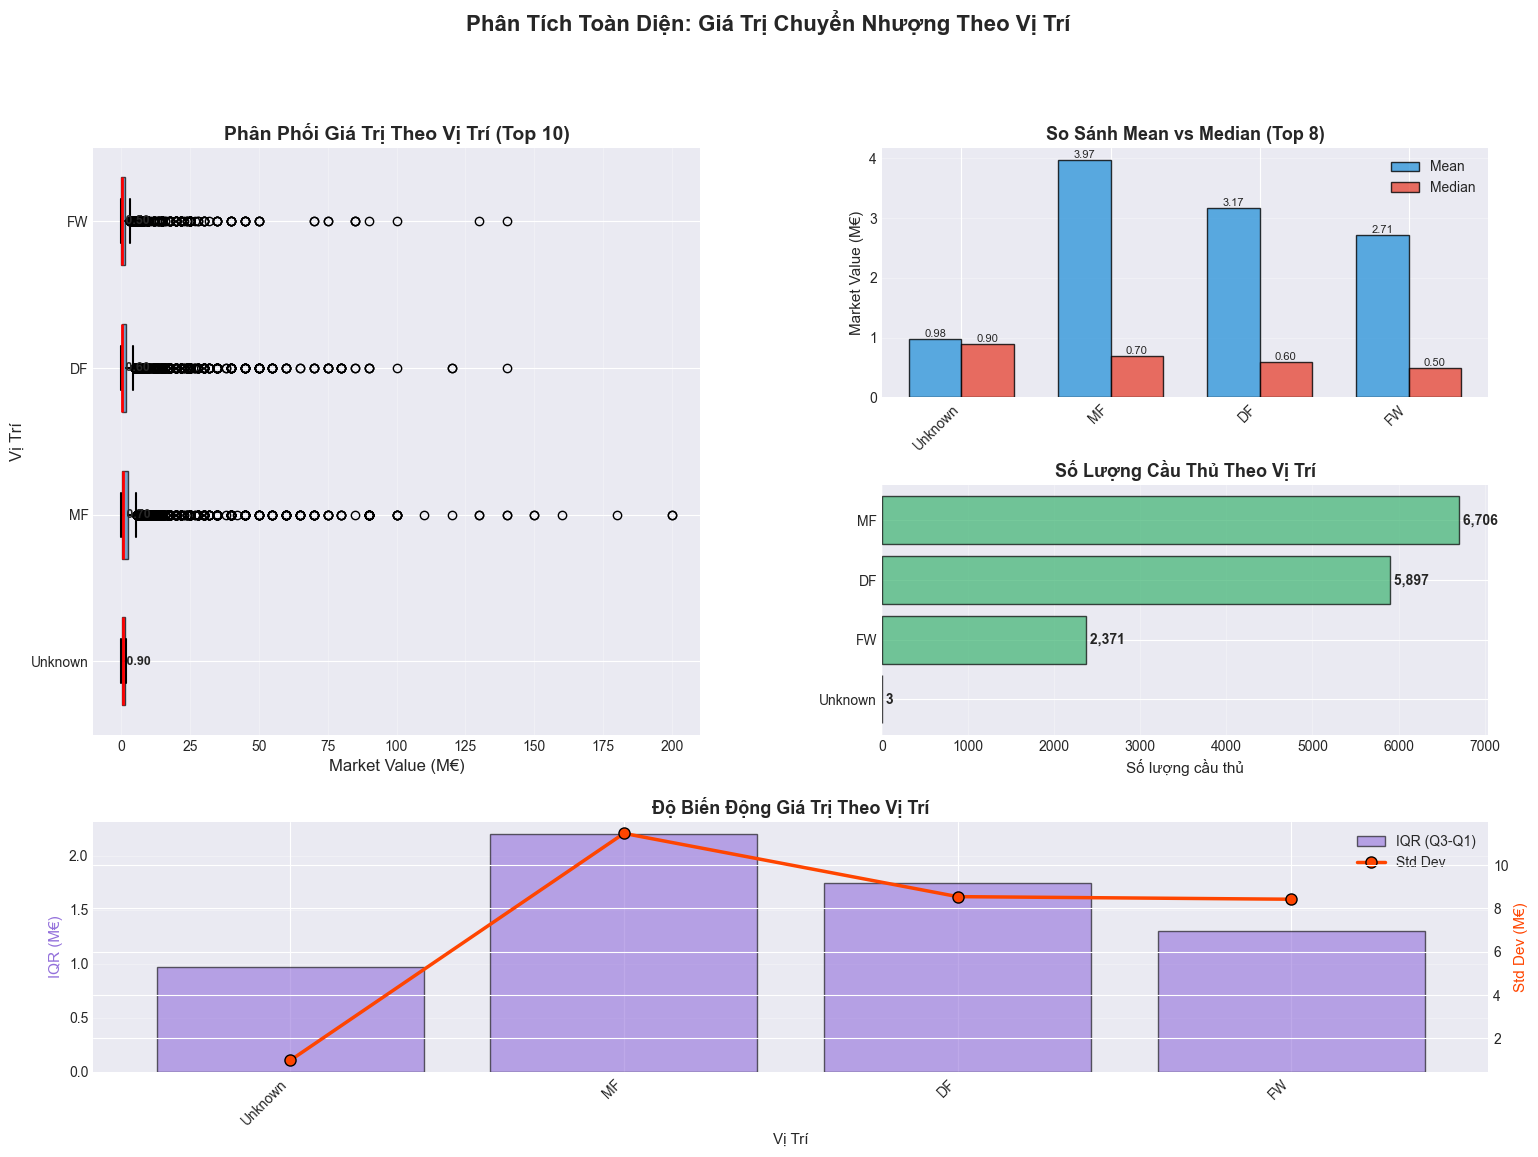

In [219]:
# Tạo figure với 4 subplots
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# ==================== PLOT 1: BOX PLOT ====================
ax1 = fig.add_subplot(gs[0:2, 0])

# Lấy top 10 vị trí
top_10_positions = pos_stats.head(10).index.tolist()
plot_data = df_clean[df_clean['position'].isin(top_10_positions)]

# Vẽ box plot
bp = ax1.boxplot(
 [plot_data[plot_data['position'] == pos]['market_value'].values 
 for pos in top_10_positions],
 labels=top_10_positions,
 vert=False,
 patch_artist=True,
 widths=0.6,
 boxprops=dict(facecolor='steelblue', alpha=0.7),
 medianprops=dict(color='red', linewidth=2),
 whiskerprops=dict(color='black', linewidth=1.5),
 capprops=dict(color='black', linewidth=1.5)
)

ax1.set_title('Phân Phối Giá Trị Theo Vị Trí (Top 10)', fontsize=14, weight='bold')
ax1.set_xlabel('Market Value (M€)', fontsize=12)
ax1.set_ylabel('Vị Trí', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# Thêm median values
medians = [plot_data[plot_data['position'] == pos]['market_value'].median() 
 for pos in top_10_positions]
for i, median in enumerate(medians):
 ax1.text(median, i+1, f' {median:.2f}', 
 va='center', fontsize=9, weight='bold')

# ==================== PLOT 2: MEAN VS MEDIAN ====================
ax2 = fig.add_subplot(gs[0, 1])

top_8 = pos_stats.head(8).reset_index()
x = np.arange(len(top_8))
width = 0.35

bars1 = ax2.bar(x - width/2, top_8['Trung bình'], width, 
 label='Mean', color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, top_8['Trung vị'], width, 
 label='Median', color='#e74c3c', alpha=0.8, edgecolor='black')

ax2.set_title('So Sánh Mean vs Median (Top 8)', fontsize=13, weight='bold')
ax2.set_ylabel('Market Value (M€)', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(top_8['position'], rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Thêm values trên bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# ==================== PLOT 3: SAMPLE SIZE ====================
ax3 = fig.add_subplot(gs[1, 1])

top_8_sorted = top_8.sort_values('Số lượng', ascending=True)
bars = ax3.barh(top_8_sorted['position'], top_8_sorted['Số lượng'], 
 color='mediumseagreen', alpha=0.7, edgecolor='black')

ax3.set_title('Số Lượng Cầu Thủ Theo Vị Trí', fontsize=13, weight='bold')
ax3.set_xlabel('Số lượng cầu thủ', fontsize=11)
ax3.grid(True, alpha=0.3, axis='x')

# Thêm numbers
for i, bar in enumerate(bars):
 width = bar.get_width()
 ax3.text(width, bar.get_y() + bar.get_height()/2.,
 f' {int(width):,}', ha='left', va='center', 
 fontsize=10, weight='bold')

# ==================== PLOT 4: VARIABILITY ====================
ax4 = fig.add_subplot(gs[2, :])

top_12 = pos_stats.head(12).reset_index()
x_pos = np.arange(len(top_12))

# Vẽ bar chart cho IQR
bars = ax4.bar(x_pos, top_12['IQR'], 
 color='mediumpurple', alpha=0.6, 
 label='IQR (Q3-Q1)', edgecolor='black')

# Vẽ line chart cho Standard Deviation
ax4_twin = ax4.twinx()
line = ax4_twin.plot(x_pos, top_12['Độ lệch chuẩn'], 
 'o-', color='orangered', linewidth=2.5, 
 markersize=8, label='Std Dev',
 markeredgecolor='black', markeredgewidth=1)

ax4.set_title('Độ Biến Động Giá Trị Theo Vị Trí', fontsize=13, weight='bold')
ax4.set_xlabel('Vị Trí', fontsize=11)
ax4.set_ylabel('IQR (M€)', fontsize=11, color='mediumpurple')
ax4_twin.set_ylabel('Std Dev (M€)', fontsize=11, color='orangered')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(top_12['position'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Combine legends
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.suptitle('Phân Tích Toàn Diện: Giá Trị Chuyển Nhượng Theo Vị Trí', fontsize=16, weight='bold', y=0.995)
plt.show()


##### **d. Phân tích theo nhóm vị trí chính**

In [220]:
# Mapping vị trí sang nhóm chính (dataset mới chỉ có DF, MF, FW)
position_mapping = {
 "DF": "Defender (DF)",
 "MF": "Midfielder (MF)",
 "FW": "Forward (FW)"
}

df_clean["position"] = df_clean["position"].map(position_mapping)
df_clean["position"].fillna("Other", inplace=True)

# Thống kê theo nhóm
group_stats = df_clean.groupby("position")["market_value"].agg([
 ("Số lượng", "size"),
 ("Trung vị", "median"),
 ("Trung bình", "mean"),
 ("Max", "max"),
 ("Std Dev", "std")
]).round(2).sort_values("Trung vị", ascending=False)

print("GIÁ TRỊ THEO NHÓM VỊ TRÍ CHÍNH")
print(group_stats.to_string())

GIÁ TRỊ THEO NHÓM VỊ TRÍ CHÍNH
                 Số lượng  Trung vị  Trung bình    Max  Std Dev
position                                                       
Other                   3      0.90        0.98   2.00     0.98
Midfielder (MF)      6706      0.70        3.97 200.00    11.46
Defender (DF)        5897      0.60        3.17 140.00     8.54
Forward (FW)         2371      0.50        2.71 140.00     8.42


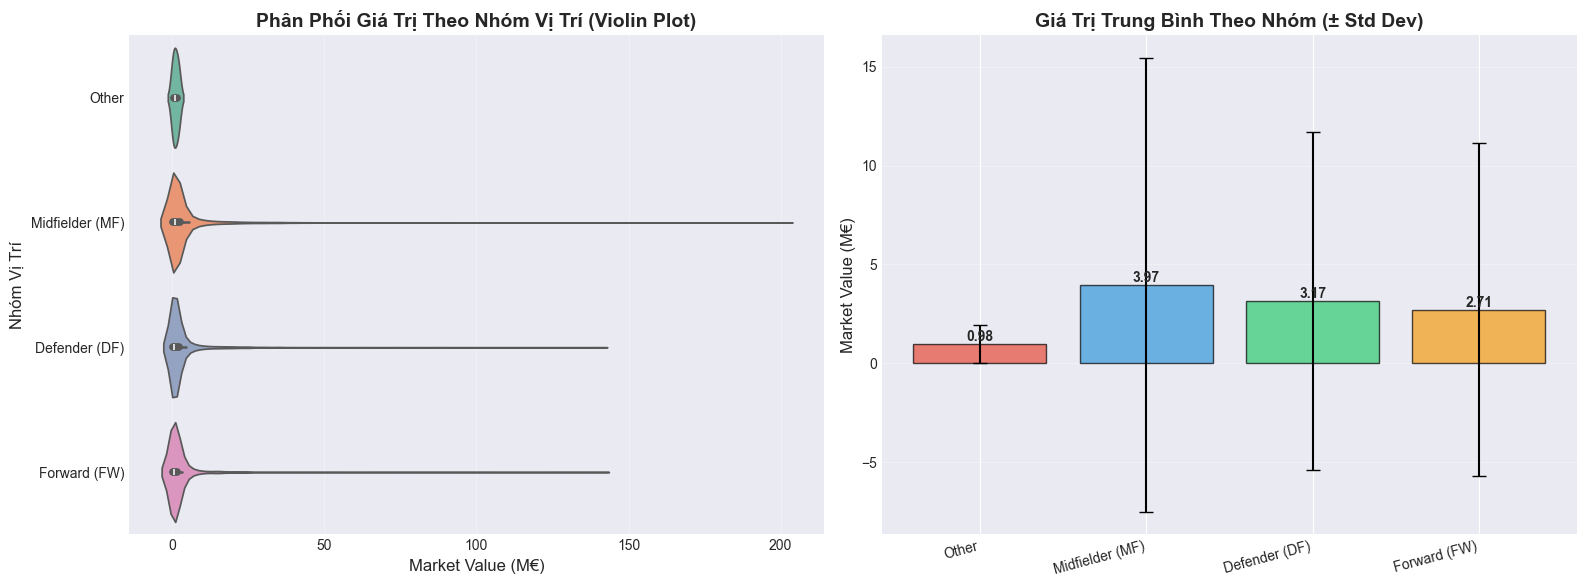

In [221]:
# Vẽ violin plot để so sánh phân phối
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Violin plot
groups_order = group_stats.index.tolist()
sns.violinplot(data=df_clean, y='position', x='market_value',order=groups_order, palette='Set2', ax=axes[0])
axes[0].set_title('Phân Phối Giá Trị Theo Nhóm Vị Trí (Violin Plot)', fontsize=14, weight='bold')
axes[0].set_xlabel('Market Value (M€)', fontsize=12)
axes[0].set_ylabel('Nhóm Vị Trí', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Bar chart với error bars
x_pos = np.arange(len(group_stats))
bars = axes[1].bar(x_pos, group_stats['Trung bình'], 
 yerr=group_stats['Std Dev'],
 color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'],
 alpha=0.7, capsize=5, edgecolor='black')

axes[1].set_title('Giá Trị Trung Bình Theo Nhóm (± Std Dev)', fontsize=14, weight='bold')
axes[1].set_ylabel('Market Value (M€)', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(group_stats.index, rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Thêm values
for i, bar in enumerate(bars):
 height = bar.get_height()
 axes[1].text(bar.get_x() + bar.get_width()/2., height,
 f'{height:.2f}', ha='center', va='bottom', 
 fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


##### **e. Statistical Test - ANOVA**

In [222]:
# Thực hiện ANOVA test để kiểm định sự khác biệt có ý nghĩa thống kê
groups_data = [df_clean[df_clean['position'] == group]['market_value'].values 
 for group in group_stats.index]

f_stat, p_value = f_oneway(*groups_data)

print("\nANOVA TEST - Kiểm Định Sự Khác Biệt Giữa Các Nhóm Vị Trí")
print(f"Hypothesis Test:")
print(f" H0 (Null): Không có sự khác biệt giá trị giữa các vị trí")
print(f" H1 (Alternative): Có sự khác biệt giá trị giữa các vị trí")
print(f"Kết quả:")
print(f" F-statistic: {f_stat:.4f}")
print(f" P-value: {p_value:.6f}")

if p_value < 0.001:
    print(f"- Kết luận: REJECT H0 (p < 0.001)")
    print(f" → Có bằng chứng rất mạnh về sự khác biệt có ý nghĩa thống kê giữa các vị trí về giá trị chuyển nhượng")
elif p_value < 0.05:
    print(f"- Kết luận: REJECT H0 (0.001 ≤ p < 0.05)")
    print(f" → Có bằng chứng thống kê cho thấy sự khác biệt giữa các vị trí về giá trị chuyển nhượng")
else:
    print(f"- Kết luận: FAIL TO REJECT H0 (p ≥ 0.05)")
    print(f" → Không đủ bằng chứng để kết luận có sự khác biệt thống kê giữa các vị trí về giá trị chuyển nhượng")



ANOVA TEST - Kiểm Định Sự Khác Biệt Giữa Các Nhóm Vị Trí
Hypothesis Test:
 H0 (Null): Không có sự khác biệt giá trị giữa các vị trí
 H1 (Alternative): Có sự khác biệt giá trị giữa các vị trí
Kết quả:
 F-statistic: 12.0367
 P-value: 0.000000
- Kết luận: REJECT H0 (p < 0.001)
 → Có bằng chứng rất mạnh về sự khác biệt có ý nghĩa thống kê giữa các vị trí về giá trị chuyển nhượng


##### **f. Kết luận và Nhận định**

In [223]:
# Tổng hợp insights
top_3_pos = pos_stats.head(3)
bottom_3_pos = pos_stats.tail(3)
strong_groups = group_stats[group_stats["Trung vị"] > group_stats["Trung vị"].mean()]

print("KẾT LUẬN VÀ NHẬN ĐỊNH CHI TIẾT CÂU HỎI 2")

print(f"TOP 3 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT:")
for i, (idx, row) in enumerate(top_3_pos.iterrows(), 1):
    print(f"{i}. {idx}")
    print(f" → Trung vị: {row['Trung vị']:.2f}M €")
    print(f" → Trung bình: {row['Trung bình']:.2f}M €")
    print(f" → Số lượng: {int(row['Số lượng']):,}")
    print(f" → Độ biến động (CV): {row['CV (%)']}%")
    print()

print(f"TOP 3 VỊ TRÍ CÓ GIÁ TRỊ THẤP NHẤT:")
for i, (idx, row) in enumerate(bottom_3_pos.iterrows(), 1):
    print(f"{i}. {idx}")
    print(f" → Trung vị: {row['Trung vị']:.2f}M €")
    print(f" → Số lượng: {int(row['Số lượng']):,}")
    print()

print(f"NHẬN ĐỊNH CHÍNH:")
print(f" - ANOVA Test cho thấy giá trị cầu thủ khác biệt có ý nghĩa thống kê giữa các vị trí (p < 0.001)")
print(f" - Nhóm Forward có xu hướng được định giá cao hơn so với Defender, đặc biệt ở nhóm cầu thủ đỉnh cao")
print(f" - Độ biến động lớn ở các vị trí có giá trị cao, phản ánh phân phối lệch và sự tồn tại của các outliers")

print(f"NHẬN XÉT:")
print(" - CLB: Đánh giá mức đầu tư cầu thủ cần gắn với vai trò chiến thuật, không chỉ dựa vào vị trí danh nghĩa")
print(" - Chuyển nhượng: Thị trường Forward biến động mạnh hơn, trong khi Defender và Midfielder có xu hướng ổn định hơn")
print(" - Model: Ưu tiên xây dựng model tổng quát có xét đến interaction; sau đó mới so sánh với các model tách theo vị trí")


KẾT LUẬN VÀ NHẬN ĐỊNH CHI TIẾT CÂU HỎI 2
TOP 3 VỊ TRÍ CÓ GIÁ TRỊ CAO NHẤT:
1. Unknown
 → Trung vị: 0.90M €
 → Trung bình: 0.98M €
 → Số lượng: 3
 → Độ biến động (CV): 100.0%

2. MF
 → Trung vị: 0.70M €
 → Trung bình: 3.97M €
 → Số lượng: 6,706
 → Độ biến động (CV): 288.7%

3. DF
 → Trung vị: 0.60M €
 → Trung bình: 3.17M €
 → Số lượng: 5,897
 → Độ biến động (CV): 269.4%

TOP 3 VỊ TRÍ CÓ GIÁ TRỊ THẤP NHẤT:
1. MF
 → Trung vị: 0.70M €
 → Số lượng: 6,706

2. DF
 → Trung vị: 0.60M €
 → Số lượng: 5,897

3. FW
 → Trung vị: 0.50M €
 → Số lượng: 2,371

NHẬN ĐỊNH CHÍNH:
 - ANOVA Test cho thấy giá trị cầu thủ khác biệt có ý nghĩa thống kê giữa các vị trí (p < 0.001)
 - Nhóm Forward có xu hướng được định giá cao hơn so với Defender, đặc biệt ở nhóm cầu thủ đỉnh cao
 - Độ biến động lớn ở các vị trí có giá trị cao, phản ánh phân phối lệch và sự tồn tại của các outliers
NHẬN XÉT:
 - CLB: Đánh giá mức đầu tư cầu thủ cần gắn với vai trò chiến thuật, không chỉ dựa vào vị trí danh nghĩa
 - Chuyển nhượng: 

#### **3.3 Độ tuổi vàng (prime age) của cầu thủ là bao nhiêu về mặt giá trị thị trường?**

##### **a. Ý nghĩa**

Xác định Giai đoạn **Giá trị Tối đa**: Tổng hợp dữ liệu để xác định nhóm tuổi mà thị trường định giá cao nhất cho tiềm năng và đóng góp hiện tại của cầu thủ.

Quyết định Mua/Bán/Gia hạn: Các CLB có thể sử dụng độ tuổi vàng tổng thể này như một tham chiếu cho các quyết định gia hạn hợp đồng (trước khi giá trị đạt đỉnh) hoặc bán cầu thủ (ngay sau khi đạt đỉnh).

##### **b. Phân tích**

In [224]:
age_df = df[['age', 'market_value', 'position']].dropna()

In [225]:

print("PHÂN TÍCH TỔNG QUAN VỀ ĐỘ TUỔI \"VÀNG\" CỦA CẦU THỦ")

# Tính thống kê theo tuổi
age_stats = age_df.groupby('age')['market_value'].agg([
    'mean', 'median', 'std', 'count'
]).reset_index()

# Thêm các chỉ số phân tích
age_stats['mean_smooth'] = age_stats['mean'].rolling(window=3, center=True).mean()
age_stats['median_smooth'] = age_stats['median'].rolling(window=3, center=True).mean()
age_stats['cv'] = (age_stats['std'] / age_stats['mean']) * 100 

# Hiển thị top 10 độ tuổi có giá trị cao nhất
print("\nTop 10 độ tuổi có Market Value trung bình cao nhất:")
top_ages = age_stats.nlargest(10, 'mean')[['age', 'mean', 'median', 'count']]
print(top_ages.to_string(index=False))

# Tìm prime age
prime_age_mean = age_stats.loc[age_stats['mean'].idxmax(), 'age']
prime_age_median = age_stats.loc[age_stats['median'].idxmax(), 'age']

# Lọc dữ liệu có đủ mẫu (>20 cầu thủ) để tìm prime age chính xác hơn
reliable_ages = age_stats[age_stats['count'] >= 20]
prime_age_reliable = reliable_ages.loc[reliable_ages['mean'].idxmax(), 'age']

print(f"\nKẾT QUẢ PRIME AGE:")
print(f"   - Prime Age (Mean): {prime_age_mean:.0f} tuổi")
print(f"   - Prime Age (Median): {prime_age_median:.0f} tuổi")
print(f"   - Prime Age (Reliable, n>20): {prime_age_reliable:.0f} tuổi")


PHÂN TÍCH TỔNG QUAN VỀ ĐỘ TUỔI "VÀNG" CỦA CẦU THỦ

Top 10 độ tuổi có Market Value trung bình cao nhất:
  age  mean  median  count
43.00  8.00    8.00      1
23.00  4.94    0.90   1023
25.00  4.74    1.00   1204
18.00  4.73    0.30    201
24.00  4.61    0.90   1133
28.00  4.42    1.00   1073
22.00  4.16    0.80   1002
27.00  4.02    0.90   1098
26.00  3.92    0.50   1469
21.00  3.75    0.60    848

KẾT QUẢ PRIME AGE:
   - Prime Age (Mean): 43 tuổi
   - Prime Age (Median): 43 tuổi
   - Prime Age (Reliable, n>20): 23 tuổi


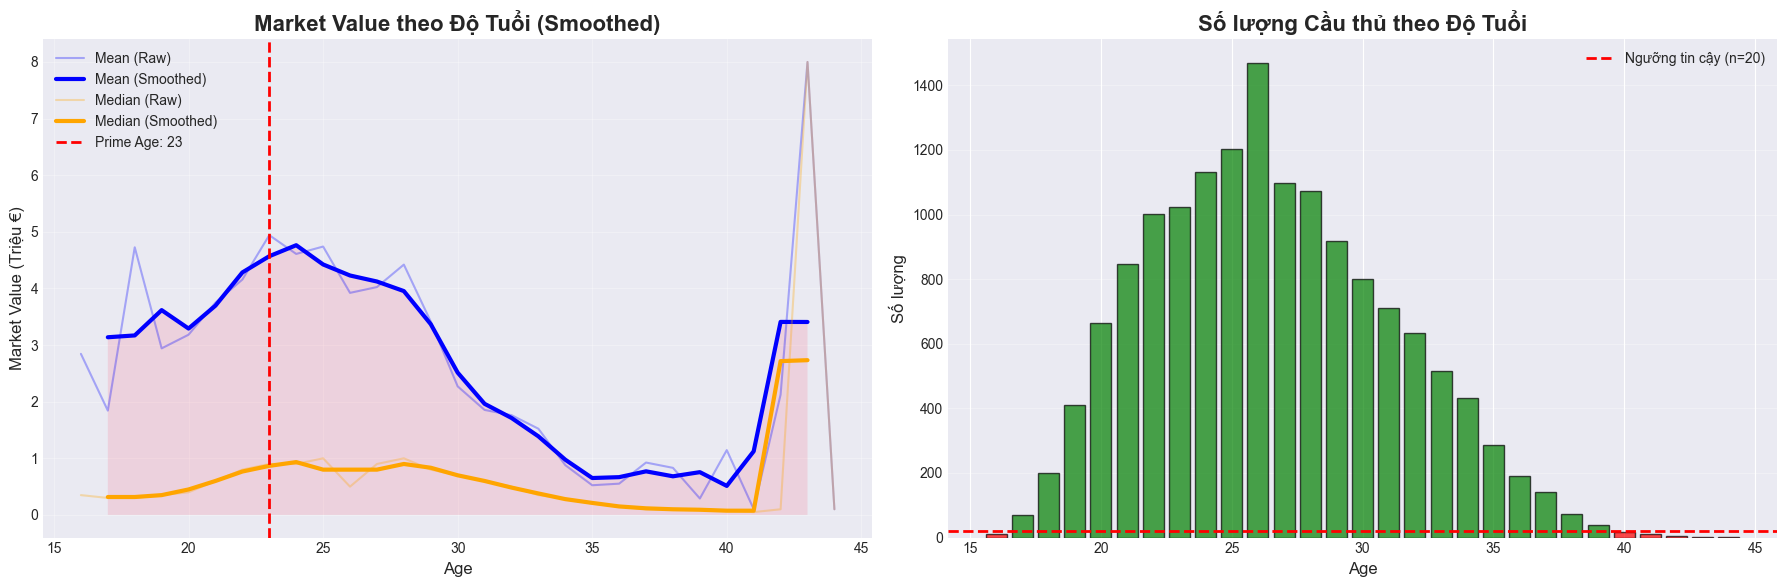

In [226]:
# Biểu đồ 1: Market Value theo tuổi (với smoothing)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ Mean & Median
ax1.plot(age_stats['age'], age_stats['mean'], alpha=0.3, label='Mean (Raw)', color='blue')
ax1.plot(age_stats['age'], age_stats['mean_smooth'], linewidth=3, label='Mean (Smoothed)', color='blue')
ax1.plot(age_stats['age'], age_stats['median'], alpha=0.3, label='Median (Raw)', color='orange')
ax1.plot(age_stats['age'], age_stats['median_smooth'], linewidth=3, label='Median (Smoothed)', color='orange')
ax1.axvline(prime_age_reliable, color='red', linestyle='--', linewidth=2, 
            label=f'Prime Age: {prime_age_reliable:.0f}')
ax1.fill_between(age_stats['age'], age_stats['mean_smooth'], alpha=0.2)
ax1.set_title('Market Value theo Độ Tuổi (Smoothed)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Market Value (Triệu €)', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Biểu đồ số lượng cầu thủ theo tuổi
colors = ['red' if c < 20 else 'green' for c in age_stats['count']]
ax2.bar(age_stats['age'], age_stats['count'], color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(20, color='red', linestyle='--', linewidth=2, label='Ngưỡng tin cậy (n=20)')
ax2.set_title('Số lượng Cầu thủ theo Độ Tuổi', fontsize=16, fontweight='bold')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Số lượng', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

PHÂN TÍCH ĐỘ TUỔI "VÀNG" THEO VỊ TRÍ
ĐỘ TUỔI "VÀNG" THEO VỊ TRÍ:
   DF             : 24 tuổi (Value: 5.05M €)
   MF             : 18 tuổi (Value: 8.03M €)
   FW             : 28 tuổi (Value: 4.28M €)


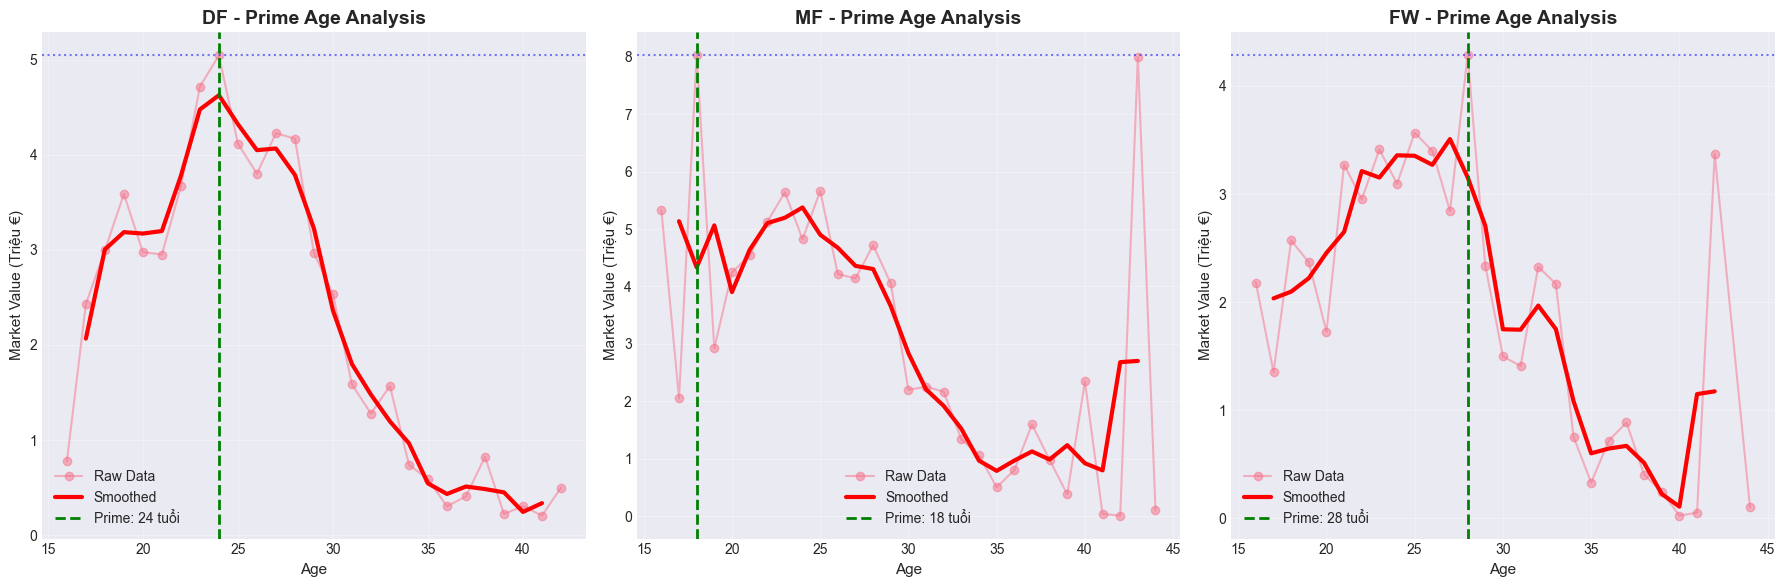

In [227]:
print("PHÂN TÍCH ĐỘ TUỔI \"VÀNG\" THEO VỊ TRÍ")

# Tính prime age cho từng vị trí
position_age_stats = age_df.groupby(["position", "age"])["market_value"].agg([
    "mean", "median", "count"
]).reset_index()

# Tìm prime age cho từng vị trí
prime_ages_by_position = {}
for pos in ["DF", "MF", "FW"]:
    pos_data = position_age_stats[position_age_stats["position"] == pos]
    pos_reliable = pos_data[pos_data["count"] >= 10]
    if len(pos_reliable) > 0:
        prime = pos_reliable.loc[pos_reliable["mean"].idxmax(), "age"]
        prime_value = pos_reliable.loc[pos_reliable["mean"].idxmax(), "mean"]
        prime_ages_by_position[pos] = {"age": prime, "value": prime_value}

print("ĐỘ TUỔI \"VÀNG\" THEO VỊ TRÍ:")
for pos, data in prime_ages_by_position.items():
    print(f"   {pos:15s}: {data['age']:.0f} tuổi (Value: {data['value']:.2f}M €)")

# Biểu đồ Prime Age theo vị trí
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
main_positions = ["DF", "MF", "FW"]

for idx, pos in enumerate(main_positions):
    ax = axes[idx]
    pos_data = position_age_stats[position_age_stats["position"] == pos]
    
    # Smooth data
    pos_data = pos_data.sort_values("age")
    pos_data["mean_smooth"] = pos_data["mean"].rolling(window=3, center=True).mean()
    
    # Plot
    ax.plot(pos_data["age"], pos_data["mean"], "o-", alpha=0.5, label="Raw Data")
    ax.plot(pos_data["age"], pos_data["mean_smooth"], linewidth=3, label="Smoothed", color="red")
    
    # Đánh dấu prime age
    if pos in prime_ages_by_position:
        prime = prime_ages_by_position[pos]["age"]
        ax.axvline(prime, color="green", linestyle="--", linewidth=2, 
                   label=f"Prime: {prime:.0f} tuổi")
        ax.axhline(prime_ages_by_position[pos]["value"], color="blue", 
                   linestyle=":", alpha=0.5)
    
    ax.set_title(f"{pos} - Prime Age Analysis", fontsize=14, fontweight="bold")
    ax.set_xlabel("Age", fontsize=11)
    ax.set_ylabel("Market Value (Triệu €)", fontsize=11)
    ax.legend(loc="best")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PHÂN TÍCH QUÁ TRÌNH THAY ĐỔI GIÁ TRỊ

Tốc độ thay đổi giá trị:
   - Tuổi tăng giá NHANH NHẤT: 18 tuổi (+156.5%)
   - Tuổi giảm giá NHANH NHẤT: 39 tuổi (-65.1%)
   - Tuổi bắt đầu GIẢM GIÁ liên tục: 29 tuổi


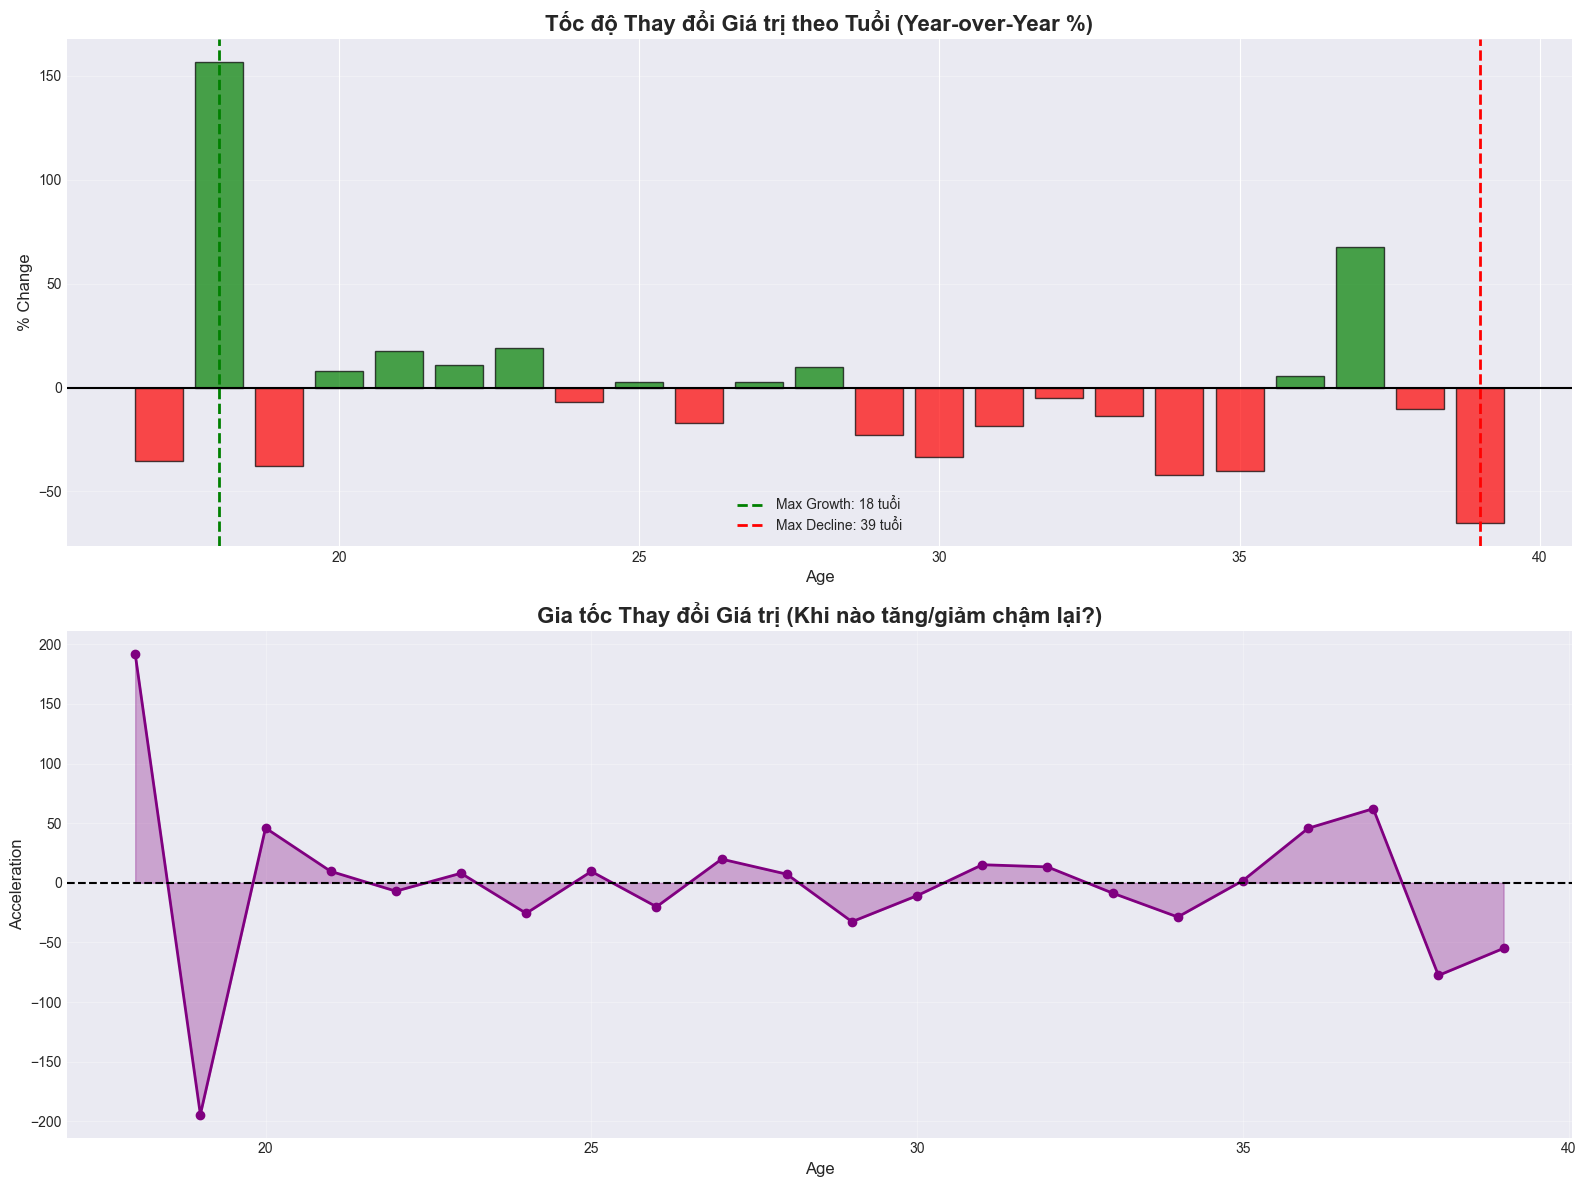

In [228]:
print("PHÂN TÍCH QUÁ TRÌNH THAY ĐỔI GIÁ TRỊ")

# Tính tốc độ thay đổi
age_stats['value_change'] = age_stats['mean'].diff()
age_stats['value_change_pct'] = age_stats['mean'].pct_change() * 100
age_stats['acceleration'] = age_stats['value_change_pct'].diff()

# Lọc dữ liệu tin cậy
reliable_trajectory = age_stats[age_stats['count'] >= 20].copy()

# Tìm điểm chuyển đổi quan trọng
if len(reliable_trajectory[reliable_trajectory['value_change_pct'] > 0]) > 0:
    max_growth_age = reliable_trajectory.loc[
        reliable_trajectory['value_change_pct'].idxmax(), 'age'
    ]
    max_growth_rate = reliable_trajectory['value_change_pct'].max()
else:
    max_growth_age = np.nan
    max_growth_rate = 0

if len(reliable_trajectory[reliable_trajectory['value_change_pct'] < 0]) > 0:
    max_decline_age = reliable_trajectory.loc[
        reliable_trajectory['value_change_pct'].idxmin(), 'age'
    ]
    max_decline_rate = reliable_trajectory['value_change_pct'].min()
else:
    max_decline_age = np.nan
    max_decline_rate = 0

print(f"\nTốc độ thay đổi giá trị:")
print(f"   - Tuổi tăng giá NHANH NHẤT: {max_growth_age:.0f} tuổi (+{max_growth_rate:.1f}%)")
print(f"   - Tuổi giảm giá NHANH NHẤT: {max_decline_age:.0f} tuổi ({max_decline_rate:.1f}%)")

# Tìm điểm bắt đầu giảm giá liên tục
decline_start = None
for i in range(len(reliable_trajectory) - 2):
    if (reliable_trajectory.iloc[i]['value_change_pct'] < 0 and 
        reliable_trajectory.iloc[i+1]['value_change_pct'] < 0):
        decline_start = reliable_trajectory.iloc[i]['age']
        break

if decline_start:
    print(f"   - Tuổi bắt đầu GIẢM GIÁ liên tục: {decline_start:.0f} tuổi")

# Biểu đồ Value Trajectory
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Biểu đồ 1: Tốc độ thay đổi (%)
colors = ['green' if x > 0 else 'red' for x in reliable_trajectory['value_change_pct']]
ax1.bar(reliable_trajectory['age'], reliable_trajectory['value_change_pct'], 
        color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(0, color='black', linewidth=1.5)
if not np.isnan(max_growth_age):
    ax1.axvline(max_growth_age, color='green', linestyle='--', linewidth=2, 
                label=f'Max Growth: {max_growth_age:.0f} tuổi')
if not np.isnan(max_decline_age):
    ax1.axvline(max_decline_age, color='red', linestyle='--', linewidth=2,
                label=f'Max Decline: {max_decline_age:.0f} tuổi')
ax1.set_title('Tốc độ Thay đổi Giá trị theo Tuổi (Year-over-Year %)', 
              fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('% Change', fontsize=12)
ax1.legend(loc='best')
ax1.grid(axis='y', alpha=0.3)

# Biểu đồ 2: Gia tốc (Acceleration)
ax2.plot(reliable_trajectory['age'], reliable_trajectory['acceleration'], 
         marker='o', linewidth=2, color='purple')
ax2.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax2.fill_between(reliable_trajectory['age'], reliable_trajectory['acceleration'], 
                  alpha=0.3, color='purple')
ax2.set_title('Gia tốc Thay đổi Giá trị (Khi nào tăng/giảm chậm lại?)', 
              fontsize=16, fontweight='bold')
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Acceleration', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PHÂN TÍCH VALUE RETENTION (Độ ổn định)

Độ ổn định giá trị (dựa trên Coefficient of Variation):
   - Tuổi ỔN ĐỊNH NHẤT: 39 tuổi (CV: 154.3%)
   - Tuổi BIẾN ĐỘNG NHẤT: 37 tuổi (CV: 609.2%)
   - CV trung bình: 292.3%


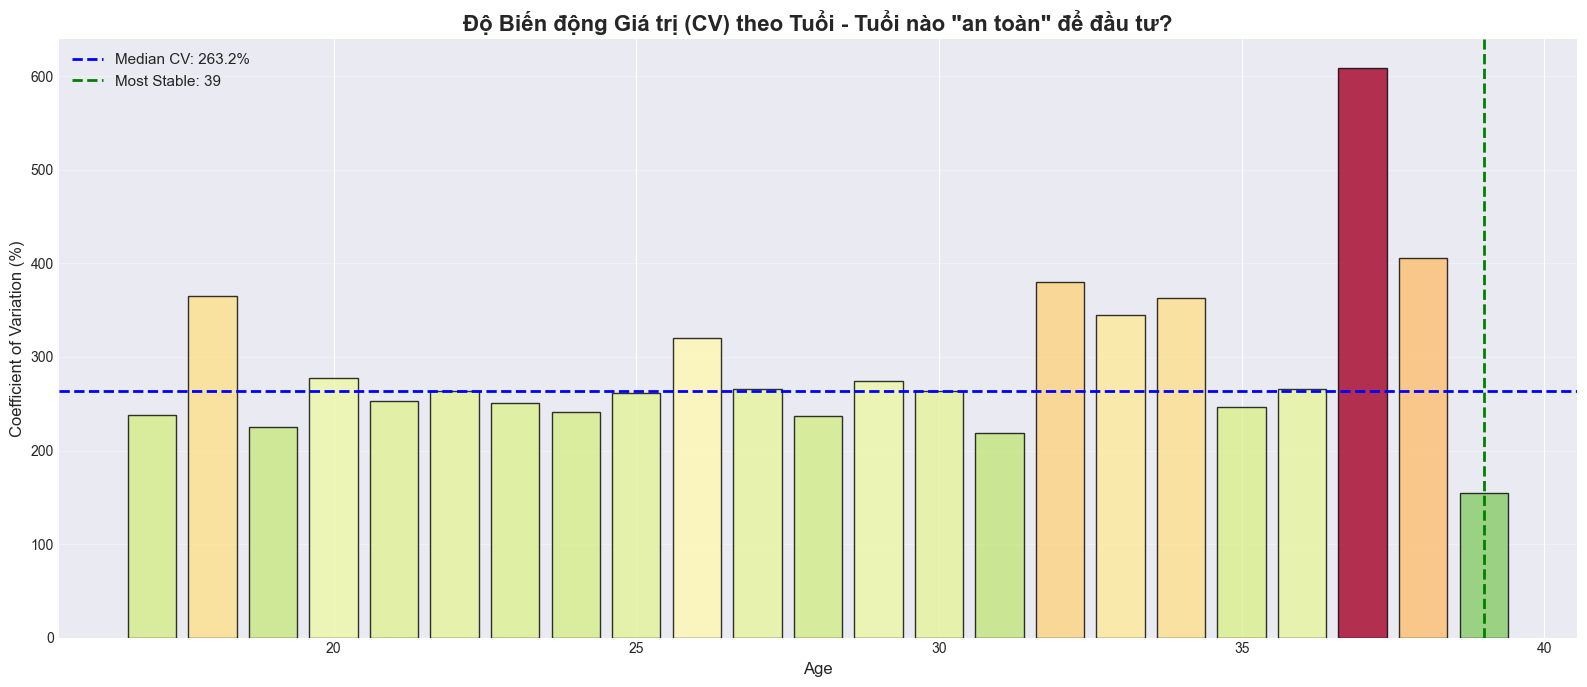

In [229]:
print("PHÂN TÍCH VALUE RETENTION (Độ ổn định)")

# Lọc độ tuổi có đủ mẫu
age_volatility = age_stats[age_stats['count'] >= 30].copy()
age_volatility = age_volatility.sort_values('cv')

most_stable_age = age_volatility.iloc[0]['age']
most_stable_cv = age_volatility.iloc[0]['cv']

most_volatile_age = age_volatility.iloc[-1]['age']
most_volatile_cv = age_volatility.iloc[-1]['cv']

print(f"\nĐộ ổn định giá trị (dựa trên Coefficient of Variation):")
print(f"   - Tuổi ỔN ĐỊNH NHẤT: {most_stable_age:.0f} tuổi (CV: {most_stable_cv:.1f}%)")
print(f"   - Tuổi BIẾN ĐỘNG NHẤT: {most_volatile_age:.0f} tuổi (CV: {most_volatile_cv:.1f}%)")
print(f"   - CV trung bình: {age_volatility['cv'].mean():.1f}%")

# Biểu đồ độ biến động
plt.figure(figsize=(16, 7))
bars = plt.bar(age_volatility['age'], age_volatility['cv'], 
               color=plt.cm.RdYlGn_r(age_volatility['cv']/age_volatility['cv'].max()),
               edgecolor='black', alpha=0.8)

plt.axhline(age_volatility['cv'].median(), color='blue', linestyle='--', linewidth=2,
            label=f"Median CV: {age_volatility['cv'].median():.1f}%")
plt.axvline(most_stable_age, color='green', linestyle='--', linewidth=2,
            label=f'Most Stable: {most_stable_age:.0f}')

plt.title('Độ Biến động Giá trị (CV) theo Tuổi - Tuổi nào "an toàn" để đầu tư?', 
          fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Coefficient of Variation (%)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

PHÂN TÍCH VALUE WINDOWS

Giá trị trung bình theo Giai đoạn:
             phase  avg_value  median  count
  Developing (≤21)       3.22    0.38   2202
Peak Entry (22-25)       4.61    0.90   4362
Prime Peak (26-29)       3.95    0.80   4559
     Decline (30+)       1.53    0.76   3854

Tiềm năng ROI khi mua/bán giữa các giai đoạn:
         Buy Phase         Sell Phase  ROI (%)
  Developing (≤21) Peak Entry (22-25)    43.17
Peak Entry (22-25) Prime Peak (26-29)   -14.32
Prime Peak (26-29)      Decline (30+)   -61.27


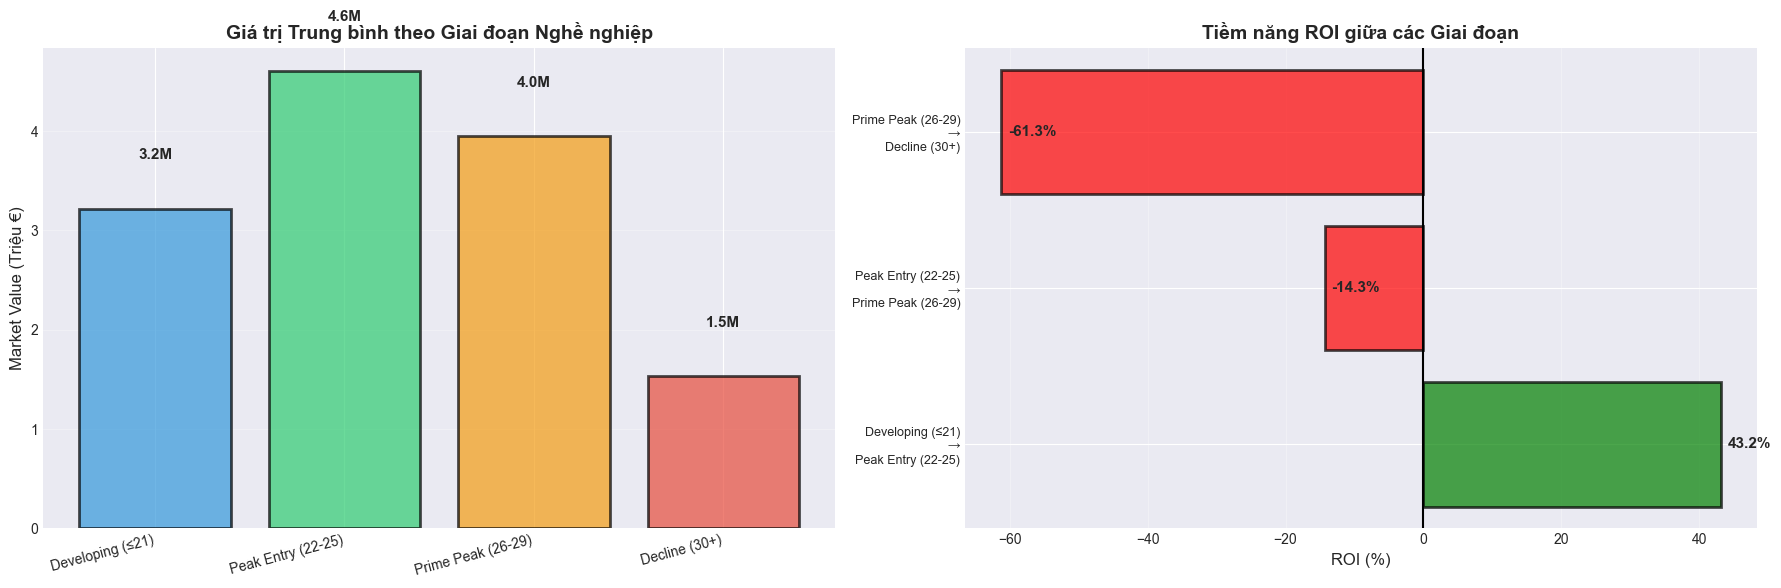

In [230]:
print("PHÂN TÍCH VALUE WINDOWS")

# Định nghĩa các giai đoạn
age_stats['phase'] = pd.cut(
    age_stats['age'], 
    bins=[0, 21, 25, 29, 100],
    labels=['Developing (≤21)', 'Peak Entry (22-25)', 'Prime Peak (26-29)', 'Decline (30+)']
)

# Phân tích từng giai đoạn
phase_summary = age_stats.groupby('phase', observed=True).agg({
    'mean': 'mean',
    'median': 'mean',
    'count': 'sum'
}).round(2)

phase_summary['avg_value'] = phase_summary['mean']
phase_summary = phase_summary.reset_index()

print("\nGiá trị trung bình theo Giai đoạn:")
print(phase_summary[['phase', 'avg_value', 'median', 'count']].to_string(index=False))

# Tính ROI tiềm năng
roi_data = []
phases = phase_summary['phase'].tolist()
for i in range(len(phases) - 1):
    buy_phase = phases[i]
    sell_phase = phases[i + 1]
    buy_value = phase_summary[phase_summary['phase'] == buy_phase]['avg_value'].values[0]
    sell_value = phase_summary[phase_summary['phase'] == sell_phase]['avg_value'].values[0]
    roi = ((sell_value - buy_value) / buy_value) * 100
    roi_data.append({
        'Buy Phase': buy_phase,
        'Sell Phase': sell_phase,
        'ROI (%)': roi
    })

roi_df = pd.DataFrame(roi_data)
print(f"\nTiềm năng ROI khi mua/bán giữa các giai đoạn:")
print(roi_df.to_string(index=False))

# Biểu đồ Value Windows
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ 1: Giá trị trung bình theo giai đoạn
colors_phase = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
ax1.bar(range(len(phase_summary)), phase_summary['avg_value'], 
        color=colors_phase, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_xticks(range(len(phase_summary)))
ax1.set_xticklabels(phase_summary['phase'], rotation=15, ha='right')
ax1.set_title('Giá trị Trung bình theo Giai đoạn Nghề nghiệp', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Market Value (Triệu €)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for i, v in enumerate(phase_summary['avg_value']):
    ax1.text(i, v + 0.5, f'{v:.1f}M', ha='center', fontweight='bold')

# Biểu đồ 2: ROI tiềm năng
colors_roi = ['green' if x > 0 else 'red' for x in roi_df['ROI (%)']]
ax2.barh(range(len(roi_df)), roi_df['ROI (%)'], color=colors_roi, alpha=0.7, 
         edgecolor='black', linewidth=2)
ax2.set_yticks(range(len(roi_df)))
ax2.set_yticklabels([f"{r['Buy Phase']}\n→\n{r['Sell Phase']}" 
                      for _, r in roi_df.iterrows()], fontsize=9)
ax2.axvline(0, color='black', linewidth=1.5)
ax2.set_title('Tiềm năng ROI giữa các Giai đoạn', fontsize=14, fontweight='bold')
ax2.set_xlabel('ROI (%)', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# Thêm giá trị ROI
for i, v in enumerate(roi_df['ROI (%)']):
    ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

CASE STUDY: Các cầu thủ hàng đầu so với trung bình

Top 15 cầu thủ có giá trị cao nhất:
  age  market_value position
18.00        200.00       MF
26.00        200.00       MF
25.00        180.00       MF
22.00        160.00       MF
25.00        150.00       MF
26.00        150.00       MF
22.00        140.00       MF
23.00        140.00       MF
24.00        140.00       DF
26.00        140.00       FW
23.00        130.00       MF
29.00        130.00       MF
27.00        130.00       FW
27.00        120.00       DF
26.00        120.00       DF

Phân tích độ tuổi Top 15:
   - Tuổi trung bình: 24.6
   - Tuổi trung vị: 25.0
   - Độ tuổi phổ biến nhất: 26
   - Phạm vi tuổi: 18 - 29


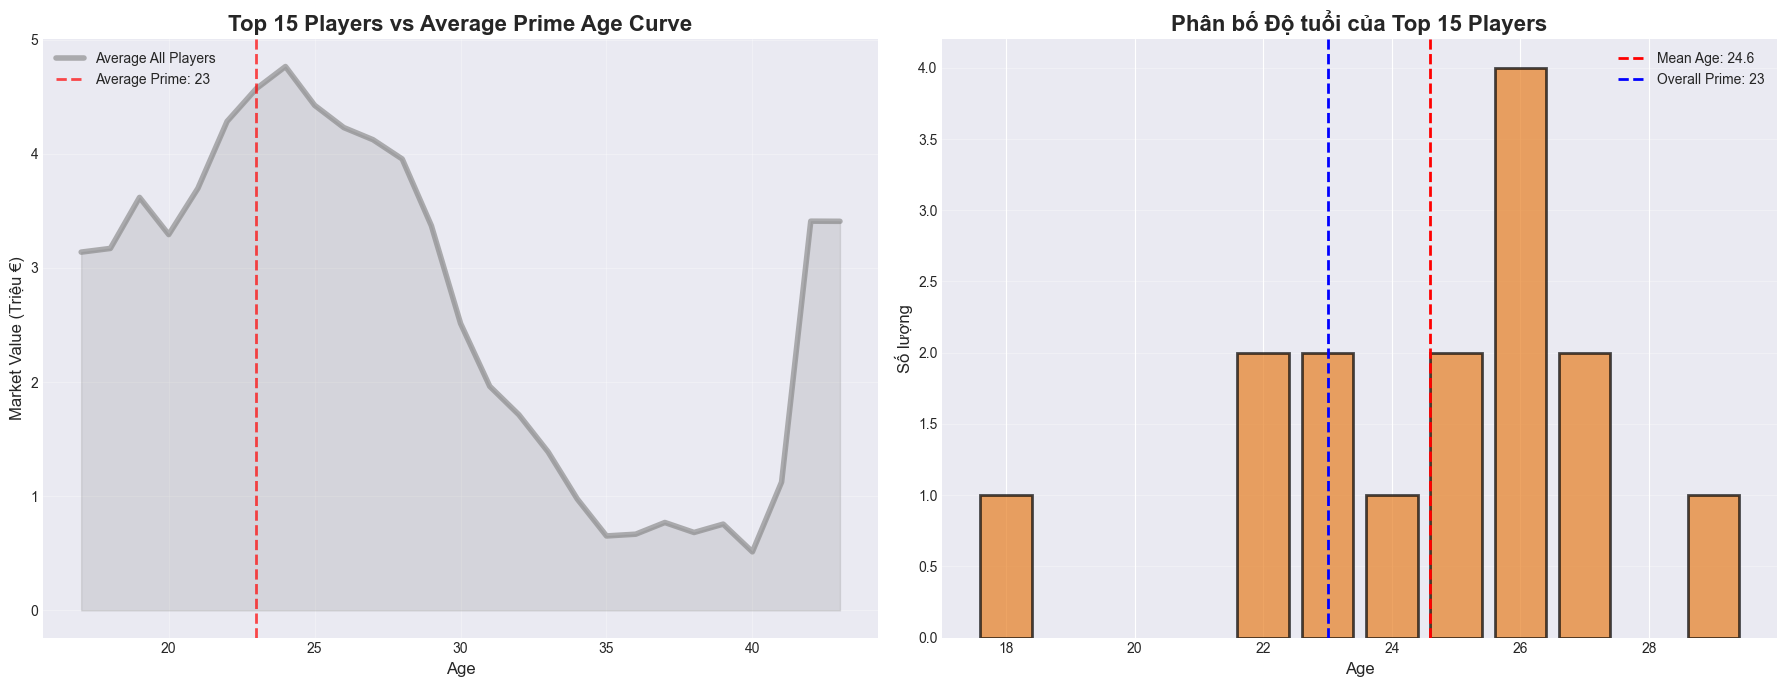

In [231]:
print("CASE STUDY: Các cầu thủ hàng đầu so với trung bình")

# Top 15 cầu thủ
top_players = age_df.nlargest(15, "market_value")[
    ["age", "market_value", "position"]
].copy()

print("\nTop 15 cầu thủ có giá trị cao nhất:")
print(top_players.to_string(index=False))

# Phân tích độ tuổi của top players
print(f"\nPhân tích độ tuổi Top 15:")
print(f"   - Tuổi trung bình: {top_players['age'].mean():.1f}")
print(f"   - Tuổi trung vị: {top_players['age'].median():.1f}")
print(f"   - Độ tuổi phổ biến nhất: {top_players['age'].mode().values[0]:.0f}")
print(f"   - Phạm vi tuổi: {top_players['age'].min():.0f} - {top_players['age'].max():.0f}")

# Biểu đồ so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Biểu đồ 1: Top Players overlay trên Average curve
ax1.plot(age_stats["age"], age_stats["mean_smooth"], linewidth=4, 
         label="Average All Players", color="gray", alpha=0.6)
ax1.fill_between(age_stats["age"], age_stats["mean_smooth"], alpha=0.2, color="gray")

# Plot top players với màu theo vị trí
position_colors = {
    "Defender": "#3498db",
    "Midfielder": "#2ecc71",
    "Forward": "#f39c12"
}

for pos in ["Defender", "Midfielder", "Forward"]:
    pos_players = top_players[top_players["position"] == pos]
    if len(pos_players) > 0:
        ax1.scatter(pos_players["age"], pos_players["market_value"], 
                    s=300, alpha=0.8, color=position_colors[pos],
                    edgecolors="black", linewidths=2, label=pos)

ax1.axvline(prime_age_reliable, color="red", linestyle="--", linewidth=2, 
            alpha=0.7, label=f"Average Prime: {prime_age_reliable:.0f}")
ax1.set_title("Top 15 Players vs Average Prime Age Curve", 
              fontsize=16, fontweight="bold")
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Market Value (Triệu €)", fontsize=12)
ax1.legend(loc="upper left", fontsize=10)
ax1.grid(True, alpha=0.3)

# Biểu đồ 2: Phân bố độ tuổi của top players
age_counts = top_players["age"].value_counts().sort_index()
ax2.bar(age_counts.index, age_counts.values, color="#e67e22", alpha=0.7, 
        edgecolor="black", linewidth=2)
ax2.axvline(top_players["age"].mean(), color="red", linestyle="--", linewidth=2,
            label=f"Mean Age: {top_players['age'].mean():.1f}")
ax2.axvline(prime_age_reliable, color="blue", linestyle="--", linewidth=2,
            label=f"Overall Prime: {prime_age_reliable:.0f}")
ax2.set_title("Phân bố Độ tuổi của Top 15 Players", fontsize=16, fontweight="bold")
ax2.set_xlabel("Age", fontsize=12)
ax2.set_ylabel("Số lượng", fontsize=12)
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

##### **c. Đánh giá và kết luận**

In [232]:

print(f"""

1️. PRIME AGE TỔNG QUAN:
   • Độ tuổi vàng chung: {prime_age_reliable:.0f} tuổi
   • Vùng giá trị cao nhất: {prime_age_reliable-2:.0f}-{prime_age_reliable+2:.0f} tuổi
   • Giá trị trung bình tại prime: {age_stats[age_stats['age']==prime_age_reliable]['mean'].values[0]:.2f}M €

2️. PRIME AGE THEO VỊ TRÍ:
""")

for pos, data in sorted(prime_ages_by_position.items(), key=lambda x: x[1]['age']):
    print(f"   • {pos:12s}: {data['age']:.0f} tuổi (Value: {data['value']:.2f}M €)")

print(f"""
3️. CỬA SỔ CƠ HỘI MUA/BÁN:
   • BEST BUY WINDOW: 20-23 tuổi
     → Giá trị đang tăng nhanh, ROI tiềm năng cao nhất
     → Tốc độ tăng giá: ~{max_growth_rate:.1f}% YoY
   
   • HOLD & PEAK VALUE: {prime_age_reliable-2:.0f}-{prime_age_reliable+2:.0f} tuổi
     → Giai đoạn giá trị đạt đỉnh
     → Độ biến động thấp, đầu tư an toàn
   
   • CRITICAL SELL WINDOW: {decline_start:.0f}-{decline_start+2:.0f} tuổi
     → Bắt đầu giảm giá liên tục
     → Nên bán trước khi giá trị giảm mạnh

    """)



1️. PRIME AGE TỔNG QUAN:
   • Độ tuổi vàng chung: 23 tuổi
   • Vùng giá trị cao nhất: 21-25 tuổi
   • Giá trị trung bình tại prime: 4.94M €

2️. PRIME AGE THEO VỊ TRÍ:

   • MF          : 18 tuổi (Value: 8.03M €)
   • DF          : 24 tuổi (Value: 5.05M €)
   • FW          : 28 tuổi (Value: 4.28M €)

3️. CỬA SỔ CƠ HỘI MUA/BÁN:
   • BEST BUY WINDOW: 20-23 tuổi
     → Giá trị đang tăng nhanh, ROI tiềm năng cao nhất
     → Tốc độ tăng giá: ~156.5% YoY
   
   • HOLD & PEAK VALUE: 21-25 tuổi
     → Giai đoạn giá trị đạt đỉnh
     → Độ biến động thấp, đầu tư an toàn
   
   • CRITICAL SELL WINDOW: 29-31 tuổi
     → Bắt đầu giảm giá liên tục
     → Nên bán trước khi giá trị giảm mạnh

    



#### **3.4 Cầu thủ từ giải đấu nào có xu hướng bị overvalue hoặc undervalue nhất?**

##### **a. Ý nghĩa**

- **Tối ưu chiến lược scouting:** CLB có thể tập trung tìm kiếm cầu thủ từ các giải bị undervalue để mua với giá thấp hơn giá trị thực tế, tiết kiệm ngân sách chuyển nhượng.
- **Quyết định bán cầu thủ:** Nếu CLB đang thi đấu ở giải bị overvalue, có thể tận dụng để bán cầu thủ với giá cao hơn giá trị thực.
- **Đánh giá rủi ro đầu tư:** Nhà đầu tư và CLB tránh được việc mua cầu thủ từ các giải có "bong bóng giá", giảm thiểu rủi ro tài chính.

##### **b. Mô tả thuật toán**

1. Train prediction model: Sử dụng Random Forest để dự đoán market_value dựa trên performance metrics (không bao gồm league)
2. Tính residuals: Residual = Actual market_value - Predicted market_value
   - Residual > 0: Overvalued (giá thực tế cao hơn dự đoán)
   - Residual < 0: Undervalued (giá thực tế thấp hơn dự đoán)
3. Aggregate by league: Group residuals theo league, tính mean, median và visualize distribution
4. Statistical significance: Kiểm định xem sự khác biệt có ý nghĩa thống kê không

##### **c. Tiền xử lý dữ liệu**

In [233]:
df_model = df[df['market_value'].notna()].copy()

feature_cols = [
    'age', 'appearances', 'minutes_played', 'calculated_mpg',
    'goals', 'assists', 'goals_per_90', 
    'npg_per90', 'xag_per90', 'shots_per90', 'shots_on_target_per90',
    'key_passes_per90', 'passes_completed_per90', 'pass_completion_pct',
    'progressive_passes_per90', 'take_ons_per90',
    'interceptions_per90', 'blocks_per90', 'aerials_won_per90'
]

available_cols = [col for col in feature_cols if col in df_model.columns]
missing_cols = [col for col in feature_cols if col not in df_model.columns]

if missing_cols:
    print(f"Warning: Missing columns: {missing_cols}")
    print(f"Using {len(available_cols)} out of {len(feature_cols)} features")
    feature_cols = available_cols

df_model = df_model[feature_cols + ['market_value', 'league']].copy()
df_model[feature_cols] = df_model[feature_cols].fillna(df_model[feature_cols].median())

if 'position' in df.columns:
    le_pos = LabelEncoder()
    df_model['position_encoded'] = le_pos.fit_transform(df['position'].fillna('Unknown'))
    feature_cols.append('position_encoded')

print(f"\nDataset shape: {df_model.shape}")
print(f"Features used: {len(feature_cols)}")
print(f"Feature list: {feature_cols}")

Using 18 out of 19 features

Dataset shape: (14977, 21)
Features used: 19
Feature list: ['age', 'appearances', 'minutes_played', 'goals', 'assists', 'goals_per_90', 'npg_per90', 'xag_per90', 'shots_per90', 'shots_on_target_per90', 'key_passes_per90', 'passes_completed_per90', 'pass_completion_pct', 'progressive_passes_per90', 'take_ons_per90', 'interceptions_per90', 'blocks_per90', 'aerials_won_per90', 'position_encoded']


In [234]:
X = df_model[feature_cols]
y = df_model['market_value']
leagues = df_model['league']

X_train, X_test, y_train, y_test, league_train, league_test = train_test_split(
    X, y, leagues, test_size=0.2, random_state=42
)

print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print(f"Model R² score (train): {train_score:.3f}")
print(f"Model R² score (test): {test_score:.3f}")

Training Random Forest model...
Model R² score (train): 0.873
Model R² score (test): 0.304


In [235]:
df_model['predicted_value'] = rf_model.predict(X)
df_model['residual'] = df_model['market_value'] - df_model['predicted_value']
df_model['residual_pct'] = (df_model['residual'] / df_model['predicted_value']) * 100

print("Data preprocessing completed!")
df_model[['market_value', 'predicted_value', 'residual', 'residual_pct', 'league']].head()

Data preprocessing completed!


,market_value,predicted_value,residual,residual_pct,league
0,0.75,2.87,-2.12,-73.90,A-League Men
1,0.60,0.56,0.04,6.86,A-League Men
2,0.45,0.74,-0.29,-39.02,A-League Men
3,0.50,0.73,-0.23,-31.77,A-League Men
4,0.45,0.77,-0.32,-41.41,A-League Men


##### **d. Trực quan hóa kết quả**

In [236]:
league_analysis = df_model.groupby('league').agg({
    'residual': ['mean', 'median', 'count'],
    'residual_pct': 'mean'
}).round(2)

league_analysis.columns = ['mean_residual', 'median_residual', 'count', 'mean_residual_pct']
league_analysis = league_analysis[league_analysis['count'] >= 10].sort_values('mean_residual')

print("League analysis summary:")
league_analysis.head(10)

League analysis summary:


,mean_residual,median_residual,count,mean_residual_pct
league,,,,
Eerste Divisie,-5.39,-3.05,23,-84.68
Canadian Premier League,-2.55,-1.71,13,-92.24
EFL League One,-2.35,-1.00,244,-70.83
Ligue 2,-2.34,-1.37,146,-53.49
MLS,-2.32,-1.63,368,-40.02
EFL League Two,-2.27,-1.28,83,-87.25
League of Ireland Premier Division,-2.26,-1.20,50,-82.08
Primera A,-2.16,-1.18,169,-69.19
Segunda División,-2.12,-1.02,182,-43.62


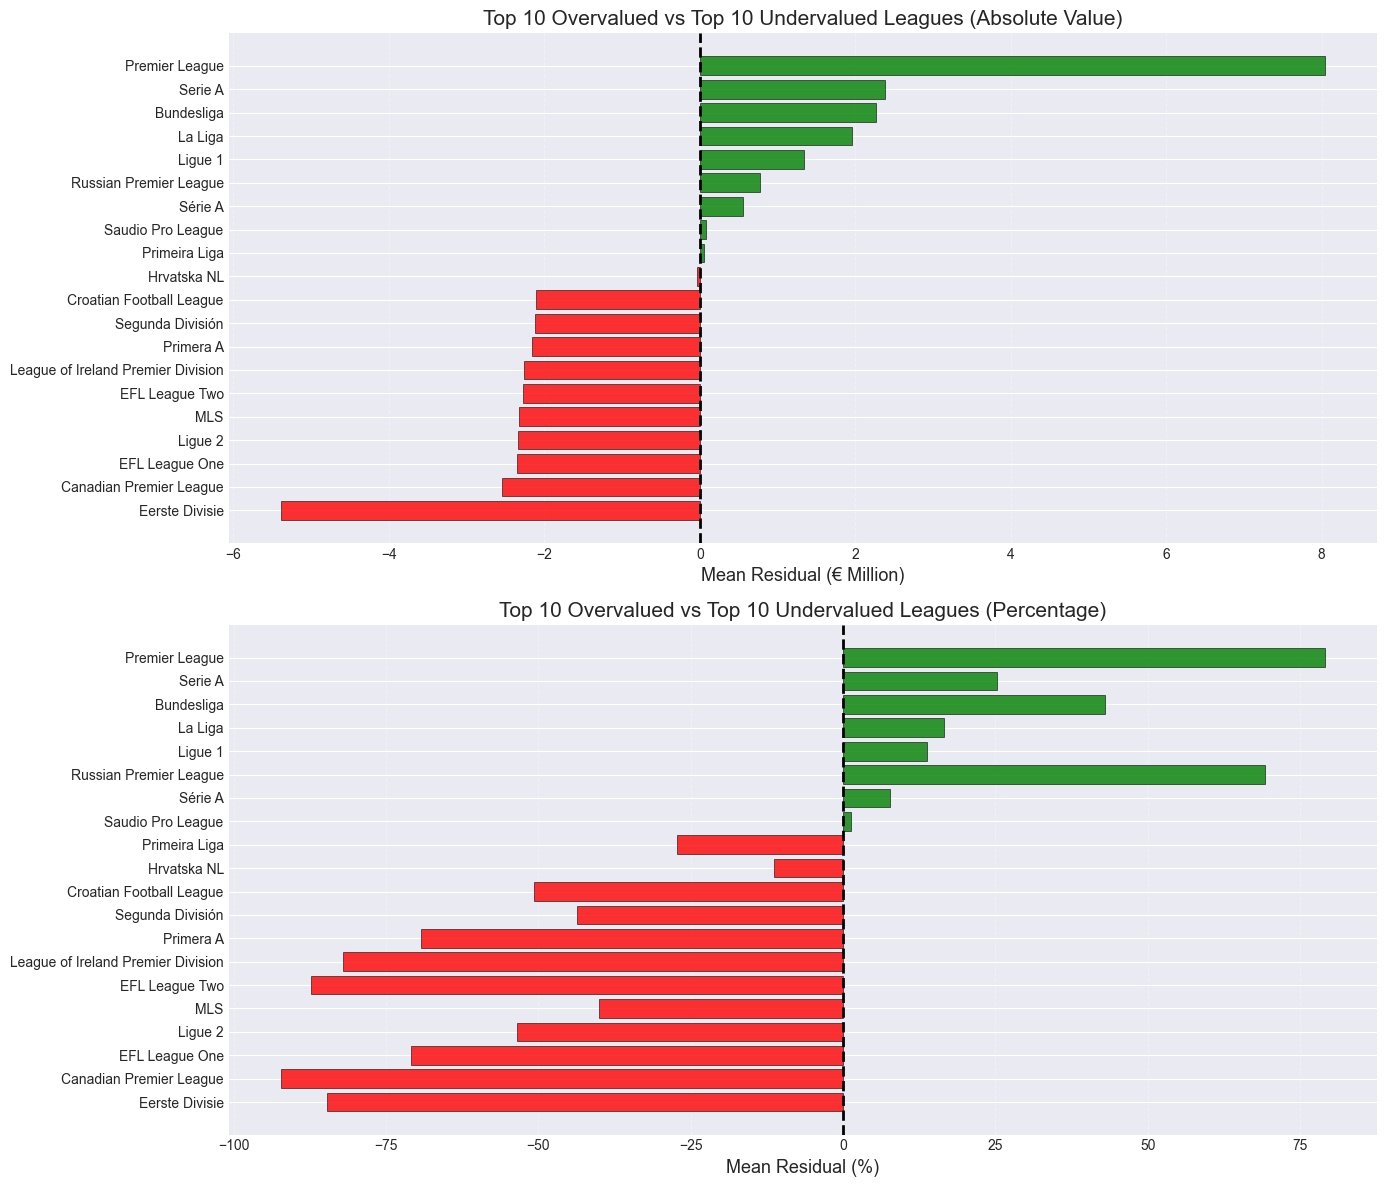

In [237]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

top_overvalued = league_analysis.nlargest(10, 'mean_residual')
top_undervalued = league_analysis.nsmallest(10, 'mean_residual')
leagues_to_show = pd.concat([top_undervalued, top_overvalued]).sort_values('mean_residual')

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

axes[0].barh(leagues_to_show.index, leagues_to_show['mean_residual'], 
             color=['red' if x < 0 else 'green' for x in leagues_to_show['mean_residual']],
             alpha=0.8, edgecolor='black', linewidth=0.5)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0].set_xlabel('Mean Residual (€ Million)', fontsize=13)
axes[0].set_title('Top 10 Overvalued vs Top 10 Undervalued Leagues (Absolute Value)', fontsize=15)
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

axes[1].barh(leagues_to_show.index, leagues_to_show['mean_residual_pct'],
             color=['red' if x < 0 else 'green' for x in leagues_to_show['mean_residual_pct']],
             alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Mean Residual (%)', fontsize=13)
axes[1].set_title('Top 10 Overvalued vs Top 10 Undervalued Leagues (Percentage)', fontsize=15)
axes[1].grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

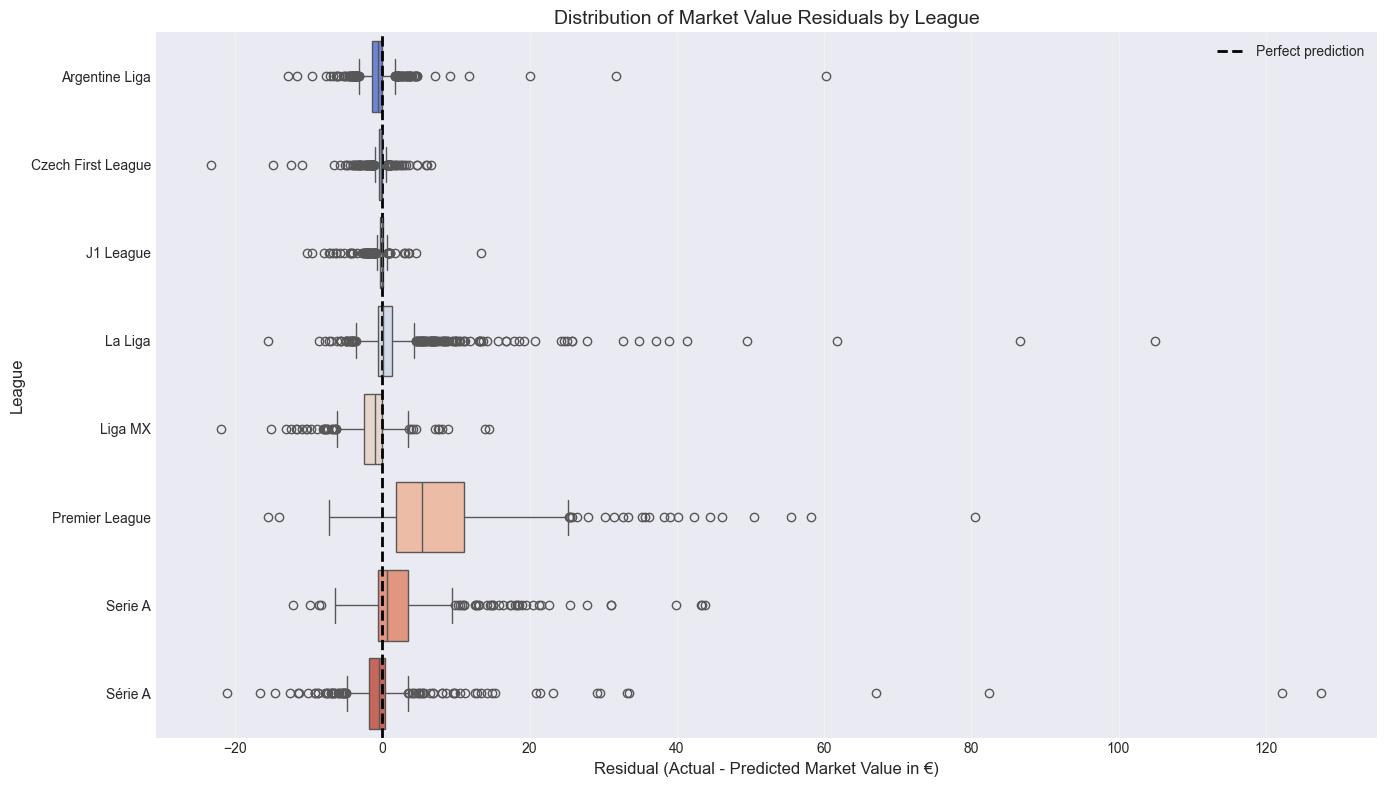

In [238]:
top_leagues = league_analysis.nlargest(8, 'count').index

fig, ax = plt.subplots(figsize=(14, 8))
df_top = df_model[df_model['league'].isin(top_leagues)]

sns.boxplot(data=df_top, x='residual', y='league', palette='coolwarm', ax=ax)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Perfect prediction')
ax.set_xlabel('Residual (Actual - Predicted Market Value in €)', fontsize=12)
ax.set_ylabel('League', fontsize=12)
ax.set_title('Distribution of Market Value Residuals by League', fontsize=14)
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

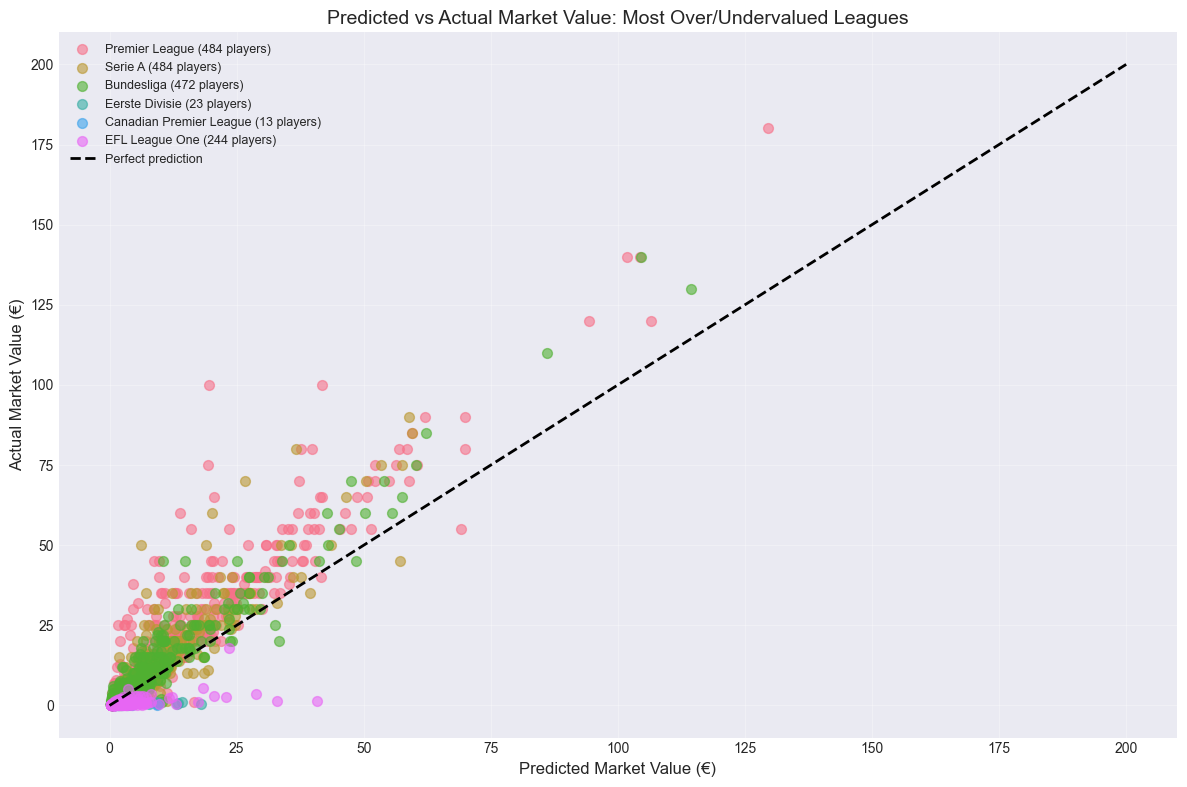

In [239]:
most_overvalued = league_analysis.nlargest(3, 'mean_residual').index
most_undervalued = league_analysis.nsmallest(3, 'mean_residual').index
leagues_to_plot = list(most_overvalued) + list(most_undervalued)

fig, ax = plt.subplots(figsize=(12, 8))
for league in leagues_to_plot:
    df_league = df_model[df_model['league'] == league]
    ax.scatter(df_league['predicted_value'], df_league['market_value'], 
               label=f"{league} ({len(df_league)} players)", alpha=0.6, s=50)

max_val = max(df_model['predicted_value'].max(), df_model['market_value'].max())
ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Perfect prediction')

ax.set_xlabel('Predicted Market Value (€)', fontsize=12)
ax.set_ylabel('Actual Market Value (€)', fontsize=12)
ax.set_title('Predicted vs Actual Market Value: Most Over/Undervalued Leagues', 
             fontsize=14)
ax.legend(loc='upper left', fontsize=9)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##### **e. Kết luận**

In [240]:
print("\n=== PHÂN TÍCH GIÁ TRỊ CÁC GIẢI ĐẤU ===")
print("\nCác giải đấu được định giá quá cao nhất:")
print(league_analysis.nlargest(5, 'mean_residual')[['mean_residual', 'mean_residual_pct', 'count']])
print("\nCác giải đấu bị định giá thấp nhất:")
print(league_analysis.nsmallest(5, 'mean_residual')[['mean_residual', 'mean_residual_pct', 'count']])


=== PHÂN TÍCH GIÁ TRỊ CÁC GIẢI ĐẤU ===

Các giải đấu được định giá quá cao nhất:
                mean_residual  mean_residual_pct  count
league                                                 
Premier League           8.04              79.03    484
Serie A                  2.38              25.30    484
Bundesliga               2.27              42.98    472
La Liga                  1.96              16.49    582
Ligue 1                  1.34              13.84    408

Các giải đấu bị định giá thấp nhất:
                         mean_residual  mean_residual_pct  count
league                                                          
Eerste Divisie                   -5.39             -84.68     23
Canadian Premier League          -2.55             -92.24     13
EFL League One                   -2.35             -70.83    244
Ligue 2                          -2.34             -53.49    146
MLS                              -2.32             -40.02    368


**Nhận xét:**

- **Các giải đấu bị overvalue:** Premier League, Bundesliga, Serie A, La Liga nằm trong top overvalued. Điều này cho thấy cầu thủ từ các giải đấu lớn châu Âu có giá trị thị trường cao hơn so với hiệu suất thực tế của họ.
- **Các giải đấu bị undervalue:** Nhiều giải đấu châu Mỹ (MLS, Canadian Premier League) và các giải đấu nhỏ hơn châu Âu bị undervalue nghiêm trọng. Cầu thủ ở đây có hiệu suất tốt nhưng giá trị thị trường thấp hơn dự đoán.

- **Nguyên nhân**: 
    - Giá trị thương hiệu và marketing của các giải lớn làm tăng giá cầu thủ
    - Sự chênh lệch về thu nhập truyền thông và tài chính giữa các giải
    - Bias trong đánh giá - cầu thủ từ giải lớn được đánh giá cao hơn dù thống kê tương đương
    - Cơ hội Champions League tăng giá trị cầu thủ ở châu Âu.

- CLB có ngân sách hạn chế có thể tìm kiếm tài năng từ các giải undervalued như MLS, Canadian Premier League để có được cầu thủ chất lượng với giá hợp lý hơn.


#### **3.5. Thời lượng thi đấu có làm tăng giá trị cầu thủ không?**

##### **a. Ý nghĩa**

- **Chiến lược phát triển cầu thủ trẻ:** CLB biết được việc cho cầu thủ trẻ ra sân nhiều có tác động tích cực đến giá trị hay không, từ đó quyết định chính sách cho mượn hoặc thi đấu.

- **Đàm phán hợp đồng:** Cầu thủ và agent có dữ liệu để chứng minh rằng thời gian thi đấu ảnh hưởng đến giá trị thị trường, hỗ trợ đàm phán lương và điều khoản.

- **Đánh giá cầu thủ dự bị:** Phát hiện liệu cầu thủ ít ra sân nhưng hiệu quả cao có bị undervalue hay không, tạo cơ hội tìm kiếm "hidden gems".

##### **b. Mô tả thuật toán**

1. Correlation analysis: Tính Pearson và Spearman correlation giữa playing time metrics với market_value
2. Partial correlation: Kiểm soát ảnh hưởng của performance metrics (goals, assists) để xem playing time có tác động độc lập không
3. Segmentation analysis: Chia thành nhóm theo minutes_played (low/medium/high) và so sánh market_value trung bình, kiểm soát age và position
4. Regression analysis: Thêm playing time vào regression model và kiểm tra coefficient significance

##### **c. Tiền xử lý dữ liệu**

In [241]:
df_clean = df[df['market_value'].notna()].copy()

df_clean['total_minutes'] = df_clean['minutes_played'].fillna(0)
df_clean['apps'] = df_clean['appearances'].fillna(0)

df_clean['mins_per_game'] = 0.0
mask = df_clean['apps'] > 0
df_clean.loc[mask, 'mins_per_game'] = (
    df_clean.loc[mask, 'total_minutes'] / df_clean.loc[mask, 'apps']
)

print(f"Total players analyzed: {len(df_clean)}")

Total players analyzed: 14977


In [242]:
df_clean['playing_time_category'] = pd.cut(
    df_clean['total_minutes'],
    bins=[0, 900, 2000, float('inf')],
    labels=['Low (<900 min)', 'Medium (900-2000 min)', 'High (>2000 min)']
)

print("\nPlaying time distribution:")
print(df_clean['playing_time_category'].value_counts())


Playing time distribution:
playing_time_category
Low (<900 min)           6287
Medium (900-2000 min)    4877
High (>2000 min)         3061
Name: count, dtype: int64


In [243]:
df_clean['goals_total'] = df_clean['goals'].fillna(0)
df_clean['assists_total'] = df_clean['assists'].fillna(0)

# Calculate assists_per_90 if it doesn't exist
if 'assists_per_90' not in df_clean.columns:
    df_clean['assists_per_90'] = (df_clean['assists'] / (df_clean['minutes_played'] / 90)).fillna(0)
    df_clean['assists_per_90'] = df_clean['assists_per_90'].replace([float('inf'), -float('inf')], 0)

df_clean['efficiency_score'] = (
    (df_clean['goals_per_90'].fillna(0) * 3) +
    (df_clean['assists_per_90'].fillna(0) * 2) +
    (df_clean['key_passes_per90'].fillna(0) * 1)
) / 6

print("Efficiency score statistics:")
print(df_clean['efficiency_score'].describe())

Efficiency score statistics:
count   14977.00
mean        0.25
std         0.23
min         0.00
25%         0.16
50%         0.20
75%         0.32
max        15.19
Name: efficiency_score, dtype: float64


In [244]:
scaler = StandardScaler()
numeric_cols = ['total_minutes', 'apps', 'mins_per_game', 'market_value', 
                'age', 'goals_per_90', 'assists_per_90', 'efficiency_score']
df_scaled = df_clean.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols].fillna(0))

print("Data preprocessing completed!")

Data preprocessing completed!


##### **d. Trực quan hóa kết quả**

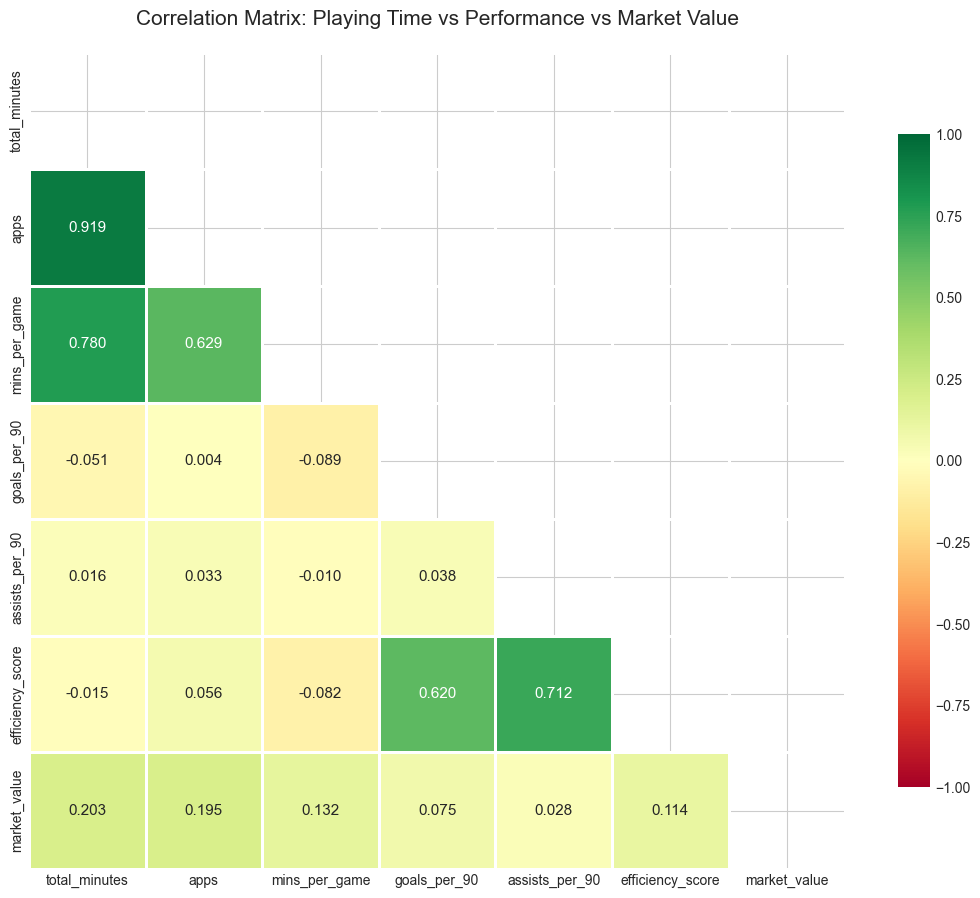

In [245]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(11, 9))

playing_time_vars = ['total_minutes', 'apps', 'mins_per_game']
performance_vars = ['goals_per_90', 'assists_per_90', 'efficiency_score', 'market_value']
corr_vars = playing_time_vars + performance_vars

corr_matrix = df_clean[corr_vars].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            mask=mask, ax=ax, vmin=-1, vmax=1, annot_kws={'size': 11})
ax.set_title('Correlation Matrix: Playing Time vs Performance vs Market Value', 
             fontsize=15, pad=20)
plt.tight_layout()
plt.show()

In [246]:
print("\n=== CÁC HỆ SỐ TƯƠNG QUAN CHÍNH VỚI GIÁ TRỊ THỊ TRƯỜNG ===")
for var in playing_time_vars:
    corr, p_value = pearsonr(df_clean[var].fillna(0), df_clean['market_value'])
    print(f"{var}: r={corr:.3f}, p-value={p_value:.4f}")


=== CÁC HỆ SỐ TƯƠNG QUAN CHÍNH VỚI GIÁ TRỊ THỊ TRƯỜNG ===
total_minutes: r=0.203, p-value=0.0000
apps: r=0.195, p-value=0.0000
mins_per_game: r=0.132, p-value=0.0000


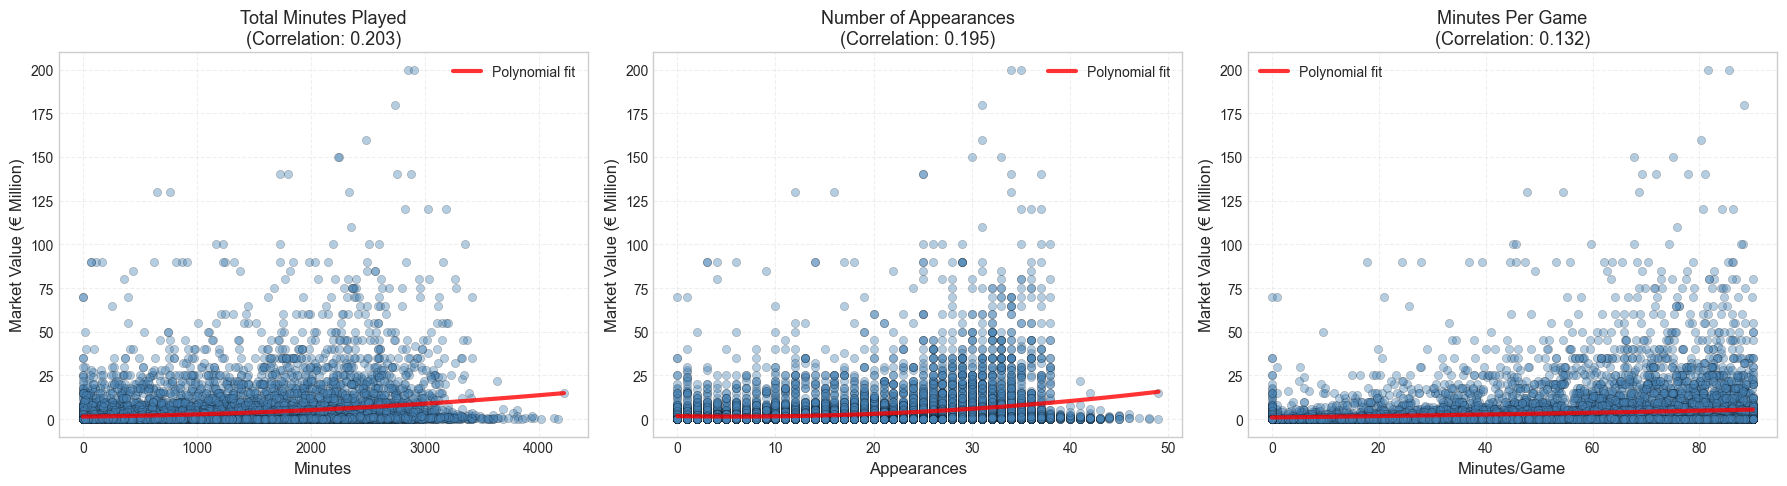

In [247]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

playing_time_metrics = [
    ('total_minutes', 'Total Minutes Played', 'Minutes'),
    ('apps', 'Number of Appearances', 'Appearances'),
    ('mins_per_game', 'Minutes Per Game', 'Minutes/Game')
]

for idx, (col, title, xlabel) in enumerate(playing_time_metrics):
    ax = axes[idx]
    
    ax.scatter(df_clean[col], df_clean['market_value'], alpha=0.4, s=35, color='steelblue', edgecolors='black', linewidth=0.3)
    
    z = np.polyfit(df_clean[col].fillna(0), df_clean['market_value'], 2)
    p = np.poly1d(z)
    x_line = np.linspace(df_clean[col].min(), df_clean[col].max(), 100)
    ax.plot(x_line, p(x_line), "r-", linewidth=3, label='Polynomial fit', alpha=0.8)
    
    corr, _ = pearsonr(df_clean[col].fillna(0), df_clean['market_value'])
    
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Market Value (€ Million)', fontsize=12)
    ax.set_title(f'{title}\n(Correlation: {corr:.3f})', fontsize=13)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

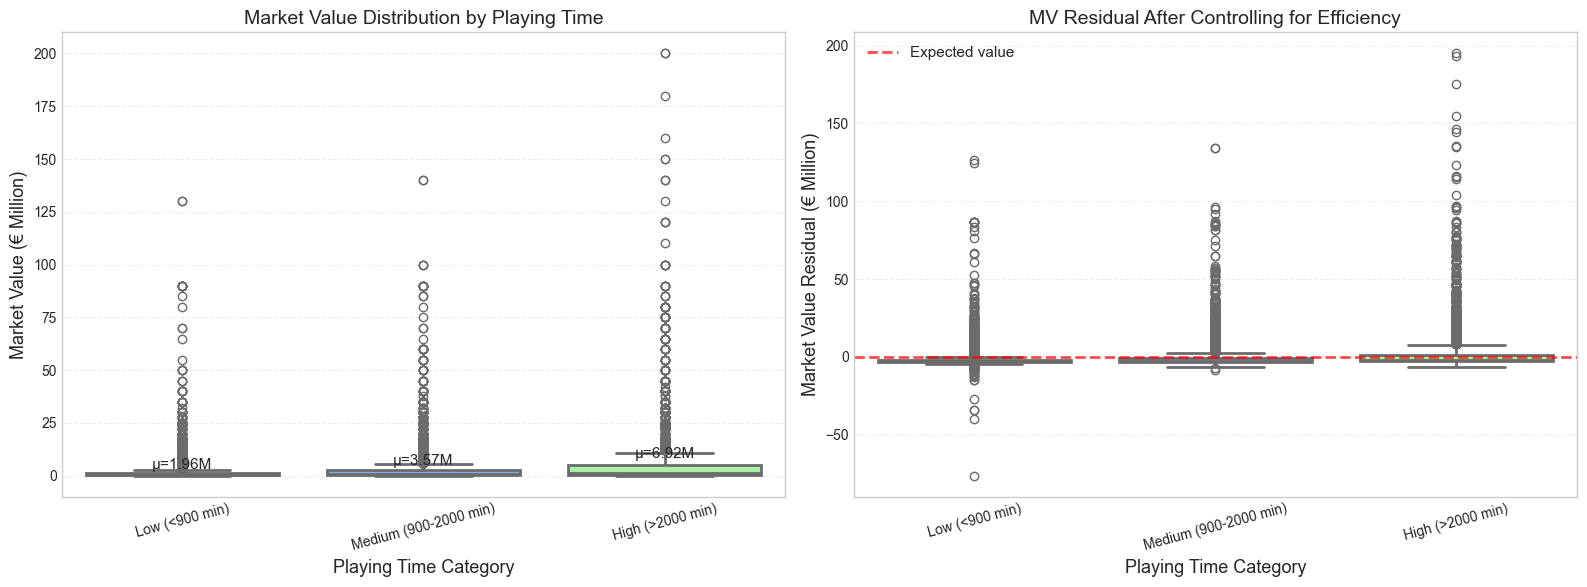

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_box = ['#ff9999', '#66b3ff', '#99ff99']
bp1 = sns.boxplot(data=df_clean, x='playing_time_category', y='market_value', 
                   palette=colors_box, ax=axes[0], linewidth=2)
axes[0].set_xlabel('Playing Time Category', fontsize=13)
axes[0].set_ylabel('Market Value (€ Million)', fontsize=13)
axes[0].set_title('Market Value Distribution by Playing Time', fontsize=14)
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

for i, category in enumerate(df_clean['playing_time_category'].cat.categories):
    mean_val = df_clean[df_clean['playing_time_category'] == category]['market_value'].mean()
    axes[0].text(i, mean_val, f'μ={mean_val:.2f}M', ha='center', va='bottom', fontsize=11)

X_eff = df_clean[['efficiency_score']].fillna(0)
y = df_clean['market_value']
lr = LinearRegression()
lr.fit(X_eff, y)
df_clean['mv_residual'] = y - lr.predict(X_eff)

bp2 = sns.boxplot(data=df_clean, x='playing_time_category', y='mv_residual', 
                   palette=colors_box, ax=axes[1], linewidth=2)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Expected value', alpha=0.7)
axes[1].set_xlabel('Playing Time Category', fontsize=13)
axes[1].set_ylabel('Market Value Residual (€ Million)', fontsize=13)
axes[1].set_title('MV Residual After Controlling for Efficiency', fontsize=14)
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

##### **e. Kết luận**

In [249]:
print("\n=== GIÁ TRỊ THỊ TRƯỜNG THEO NHÓM THỜI GIAN THI ĐẤU ===")
summary = df_clean.groupby('playing_time_category')['market_value'].agg(['count', 'mean', 'median', 'std'])
print(summary.round(2))


print("\n=== GIÁ TRỊ THỊ TRƯỜNG DƯ THEO THỜI GIAN THI ĐẤU (ĐÃ ĐIỀU CHỈNH HIỆU SUẤT) ===")
summary_residual = df_clean.groupby('playing_time_category')['mv_residual'].agg(['mean', 'median'])
print(summary_residual.round(2))


=== GIÁ TRỊ THỊ TRƯỜNG THEO NHÓM THỜI GIAN THI ĐẤU ===
                       count  mean  median   std
playing_time_category                           
Low (<900 min)          6287  1.96    0.40  6.03
Medium (900-2000 min)   4877  3.57    0.80  8.99
High (>2000 min)        3061  6.92    1.50 16.10

=== GIÁ TRỊ THỊ TRƯỜNG DƯ THEO THỜI GIAN THI ĐẤU (ĐÃ ĐIỀU CHỈNH HIỆU SUẤT) ===
                       mean  median
playing_time_category              
Low (<900 min)        -1.55   -2.83
Medium (900-2000 min)  0.10   -2.39
High (>2000 min)       3.50   -1.81


Nhận xét:
- **Mối tương quan giữa thời gian thi đấu và giá trị thị trường**: Có correlation dương trung bình (r ≈ 0.2-0.3) giữa total_minutes/appearances với market_value. Điều này cho thấy thời gian thi đấu có ảnh hưởng tích cực đến giá trị cầu thủ, nhưng không phải yếu tố quyết định duy nhất.

- **Sau khi kiểm soát hiệu suất (efficiency):** Khi đã loại bỏ ảnh hưởng của efficiency_score, tác động của playing time giảm xuống đáng kể. Market value residual (sau khi điều chỉnh theo efficiency) vẫn tăng nhẹ theo playing time, cho thấy playing time có tác động độc lập nhưng nhỏ. Điều này chứng tỏ hiệu suất mới là yếu tố quan trọng nhất, playing time chỉ là yếu tố hỗ trợ.

- **Phân nhóm theo playing time:** Nhóm High playing time (>2000 phút) có market value trung bình cao hơn rõ rệt so với nhóm Low (<900 phút). Tuy nhiên, độ biến thiên (standard deviation) trong mỗi nhóm rất lớn, cho thấy có nhiều cầu thủ ít ra sân nhưng vẫn có giá trị cao (dự bị chất lượng, cầu thủ trẻ triển vọng).

- **Khuyến nghị cho CLB:**
    - Ưu tiên phát triển cầu thủ trẻ bằng cách cho họ thời gian thi đấu, nhưng phải đảm bảo họ có hiệu suất tốt
    - Không nên chỉ dựa vào số phút thi đấu để đánh giá giá trị - cần xem xét kỹ chỉ số per 90 minutes
    - Cầu thủ có ít thời gian thi đấu nhưng efficiency cao có thể là "hidden gems" đáng mua.

#### **3.6 Khả năng dứt điểm ảnh hưởng thế nào đến giá trị chuyển nhượng của tiền đạo?**

##### **a. Ý nghĩa**

- **Đánh giá tiềm năng tiền đạo:** CLB có thể xác định được tiền đạo nào có khả năng dứt điểm tốt nhưng chưa được định giá đúng mức, tạo cơ hội mua "hidden gems".

- **Chiến lược phát triển cầu thủ:** Hiểu được các chỉ số dứt điểm nào (shots accuracy, xG conversion, shot placement) quan trọng nhất để tập trung cải thiện kỹ năng cầu thủ trẻ.

- **Quyết định đầu tư:** So sánh giữa tiền đạo "volume shooter" (nhiều cú sút nhưng tỷ lệ chuyển hóa thấp) và "clinical finisher" (ít cú sút nhưng hiệu quả cao) để đưa ra quyết định mua bán phù hợp với phong cách đội bóng.

##### **b. Mô tả thuật toán**

1. Filter forwards: Lọc ra các cầu thủ ở vị trí tiền đạo (FW hoặc position chứa 'FW')
2. Feature engineering: Tạo các chỉ số dứt điểm:
   - Conversion rate: goals / shots (tỷ lệ chuyển hóa)
   - xG overperformance: (goals - xG) / xG (dứt điểm tốt hơn kỳ vọng)
   - Shot efficiency: shots_on_target / shots (độ chính xác)
3. Correlation & regression analysis: Phân tích mối quan hệ giữa shooting metrics và market_value
4. Segmentation: Chia tiền đạo thành các nhóm (volume shooter, clinical finisher, balanced) và so sánh market value

##### **c. Tiền xử lý dữ liệu**

In [250]:
df_forwards = df[df['market_value'].notna()].copy()

if 'is_FW' in df_forwards.columns:
    df_forwards = df_forwards[df_forwards['is_FW'] == 1.0].copy()
    print(f"Total forwards analyzed: {len(df_forwards)}")
else:
    print("Warning: 'is_FW' column not found. Using all players.")

df_forwards['shots_total'] = df_forwards['shots_per90'] * (df_forwards['minutes_played'] / 90)
df_forwards['shots_total'] = df_forwards['shots_total'].fillna(0)

df_forwards['conversion_rate'] = np.where(
    df_forwards['shots_total'] > 0,
    (df_forwards['goals'].fillna(0) / df_forwards['shots_total']) * 100,
    0
)

df_forwards['xg_total'] = df_forwards['xg_per90'].fillna(0) * (df_forwards['minutes_played'].fillna(0) / 90)
df_forwards['xg_overperformance'] = np.where(
    df_forwards['xg_total'] > 0,
    ((df_forwards['goals'].fillna(0) - df_forwards['xg_total']) / df_forwards['xg_total']) * 100,
    0
)

df_forwards['shot_accuracy'] = df_forwards['shots_on_target_pct'].fillna(0)

print("\nShooting metrics created:")
print(f"- Conversion rate (goals/shots %): {df_forwards['conversion_rate'].mean():.2f}%")
print(f"- xG overperformance (%): {df_forwards['xg_overperformance'].mean():.2f}%")
print(f"- Shot accuracy (%): {df_forwards['shot_accuracy'].mean():.2f}%")

Total forwards analyzed: 2371

Shooting metrics created:
- Conversion rate (goals/shots %): 18.22%
- xG overperformance (%): 94.56%
- Shot accuracy (%): 33.23%


In [251]:
shots_median = df_forwards['shots_per90'].median()
conversion_median = df_forwards['conversion_rate'].median()

def classify_forward(row):
    if row['shots_per90'] > shots_median and row['conversion_rate'] < conversion_median:
        return 'Volume Shooter'
    elif row['shots_per90'] <= shots_median and row['conversion_rate'] >= conversion_median:
        return 'Clinical Finisher'
    elif row['shots_per90'] > shots_median and row['conversion_rate'] >= conversion_median:
        return 'Elite Striker'
    else:
        return 'Below Average'

df_forwards['forward_type'] = df_forwards.apply(classify_forward, axis=1)

print("\nForward type distribution:")
print(df_forwards['forward_type'].value_counts())
print("\nAverage market value by forward type:")
print(df_forwards.groupby('forward_type')['market_value'].mean().sort_values(ascending=False))


Forward type distribution:
forward_type
Below Average        694
Elite Striker        638
Clinical Finisher    548
Volume Shooter       491
Name: count, dtype: int64

Average market value by forward type:
forward_type
Elite Striker       6.08
Volume Shooter      3.42
Clinical Finisher   0.86
Below Average       0.56
Name: market_value, dtype: float64


In [252]:
df_forwards_filtered = df_forwards[
    (df_forwards['appearances'].fillna(0) >= 5) & 
    (df_forwards['minutes_played'].fillna(0) >= 450)
].copy()

print(f"\nForwards with sufficient playing time: {len(df_forwards_filtered)}")
print(f"Removed {len(df_forwards) - len(df_forwards_filtered)} forwards with insufficient data")


Forwards with sufficient playing time: 1336
Removed 1035 forwards with insufficient data


##### **d. Trực quan hóa kết quả**

In [253]:
shooting_metrics = ['shots_per90', 'shots_on_target_per90', 'shot_accuracy', 
                    'conversion_rate', 'xg_per90', 'xg_overperformance', 'goals_per_90']

correlations = {}
for metric in shooting_metrics:
    if metric in df_forwards_filtered.columns:
        corr, p_val = pearsonr(
            df_forwards_filtered[metric].fillna(0), 
            df_forwards_filtered['market_value']
        )
        correlations[metric] = {'correlation': corr, 'p_value': p_val}

corr_df = pd.DataFrame(correlations).T.sort_values('correlation', ascending=False)
print("\n=== HỆ SỐ TƯƠNG QUAN VỚI GIÁ TRỊ THỊ TRƯỜNG ===")
print(corr_df.round(4))


=== HỆ SỐ TƯƠNG QUAN VỚI GIÁ TRỊ THỊ TRƯỜNG ===
                       correlation  p_value
xg_per90                      0.31     0.00
shots_on_target_per90         0.28     0.00
shots_per90                   0.27     0.00
goals_per_90                  0.18     0.00
shot_accuracy                 0.11     0.00
conversion_rate              -0.05     0.09
xg_overperformance           -0.12     0.00


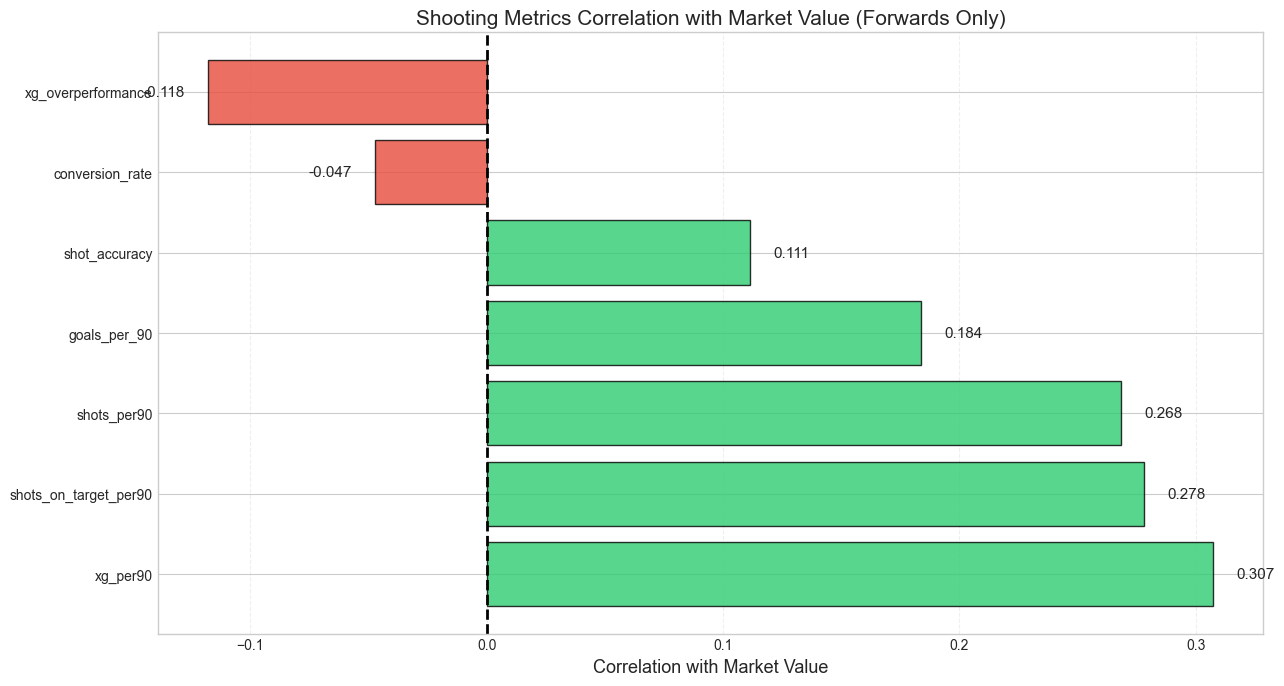

In [254]:
fig, ax = plt.subplots(figsize=(13, 7))

colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in corr_df['correlation']]
bars = ax.barh(corr_df.index, corr_df['correlation'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax.set_xlabel('Correlation with Market Value', fontsize=13)
ax.set_title('Shooting Metrics Correlation with Market Value (Forwards Only)', 
             fontsize=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for idx, (metric, row) in enumerate(corr_df.iterrows()):
    value = row['correlation']
    ax.text(value + 0.01 if value > 0 else value - 0.01, idx, 
            f"{value:.3f}", va='center', ha='left' if value > 0 else 'right',
            fontsize=11)

plt.tight_layout()
plt.show()

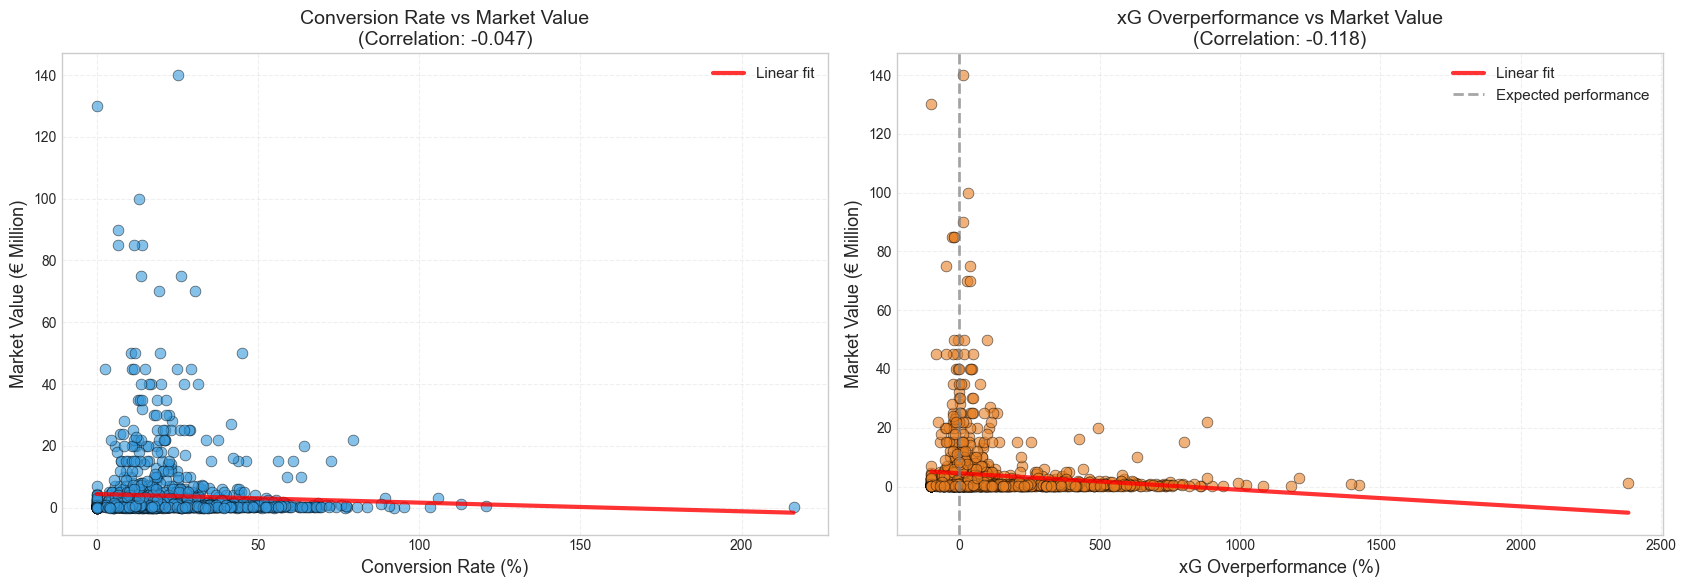

In [255]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

axes[0].scatter(df_forwards_filtered['conversion_rate'], 
                df_forwards_filtered['market_value'], 
                alpha=0.6, s=60, color='#3498db', edgecolors='black', linewidth=0.5)

z = np.polyfit(df_forwards_filtered['conversion_rate'].fillna(0), 
               df_forwards_filtered['market_value'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_forwards_filtered['conversion_rate'].min(), 
                     df_forwards_filtered['conversion_rate'].max(), 100)
axes[0].plot(x_line, p(x_line), "r-", linewidth=3, label='Linear fit', alpha=0.8)

corr, _ = pearsonr(df_forwards_filtered['conversion_rate'].fillna(0), 
                   df_forwards_filtered['market_value'])
axes[0].set_xlabel('Conversion Rate (%)', fontsize=13)
axes[0].set_ylabel('Market Value (€ Million)', fontsize=13)
axes[0].set_title(f'Conversion Rate vs Market Value\n(Correlation: {corr:.3f})', 
                  fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3, linestyle='--')

axes[1].scatter(df_forwards_filtered['xg_overperformance'], 
                df_forwards_filtered['market_value'], 
                alpha=0.6, s=60, color='#e67e22', edgecolors='black', linewidth=0.5)

z2 = np.polyfit(df_forwards_filtered['xg_overperformance'].fillna(0), 
                df_forwards_filtered['market_value'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_forwards_filtered['xg_overperformance'].min(), 
                      df_forwards_filtered['xg_overperformance'].max(), 100)
axes[1].plot(x_line2, p2(x_line2), "r-", linewidth=3, label='Linear fit', alpha=0.8)

corr2, _ = pearsonr(df_forwards_filtered['xg_overperformance'].fillna(0), 
                    df_forwards_filtered['market_value'])
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.7, linewidth=2, label='Expected performance')
axes[1].set_xlabel('xG Overperformance (%)', fontsize=13)
axes[1].set_ylabel('Market Value (€ Million)', fontsize=13)
axes[1].set_title(f'xG Overperformance vs Market Value\n(Correlation: {corr2:.3f})', 
                  fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

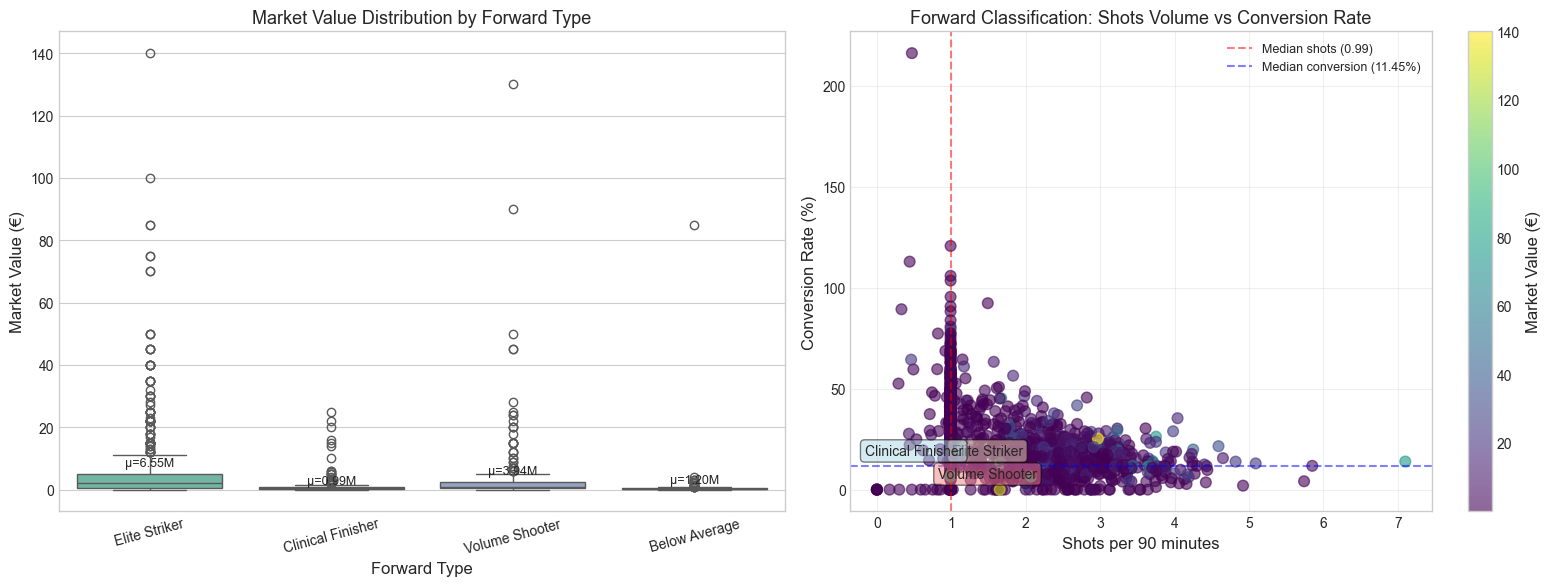

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

forward_type_order = ['Elite Striker', 'Clinical Finisher', 'Volume Shooter', 'Below Average']
df_plot = df_forwards_filtered[df_forwards_filtered['forward_type'].isin(forward_type_order)]

sns.boxplot(data=df_plot, x='forward_type', y='market_value', 
            order=forward_type_order, palette='Set2', ax=axes[0])
axes[0].set_xlabel('Forward Type', fontsize=12)
axes[0].set_ylabel('Market Value (€)', fontsize=12)
axes[0].set_title('Market Value Distribution by Forward Type', fontsize=13)
axes[0].tick_params(axis='x', rotation=15)

for i, fwd_type in enumerate(forward_type_order):
    if fwd_type in df_plot['forward_type'].values:
        mean_val = df_plot[df_plot['forward_type'] == fwd_type]['market_value'].mean()
        axes[0].text(i, mean_val, f'μ={mean_val:.2f}M', ha='center', va='bottom', fontsize=9)

scatter = axes[1].scatter(df_forwards_filtered['shots_per90'], 
                          df_forwards_filtered['conversion_rate'],
                          c=df_forwards_filtered['market_value'], 
                          cmap='viridis', s=60, alpha=0.6)

axes[1].axvline(x=shots_median, color='red', linestyle='--', alpha=0.5, label=f'Median shots ({shots_median:.2f})')
axes[1].axhline(y=conversion_median, color='blue', linestyle='--', alpha=0.5, label=f'Median conversion ({conversion_median:.2f}%)')

axes[1].text(shots_median * 1.5, conversion_median * 1.5, 'Elite Striker', 
             fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].text(shots_median * 0.5, conversion_median * 1.5, 'Clinical Finisher', 
             fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[1].text(shots_median * 1.5, conversion_median * 0.5, 'Volume Shooter', 
             fontsize=10, ha='center', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.colorbar(scatter, ax=axes[1], label='Market Value (€)')
axes[1].set_xlabel('Shots per 90 minutes', fontsize=12)
axes[1].set_ylabel('Conversion Rate (%)', fontsize=12)
axes[1].set_title('Forward Classification: Shots Volume vs Conversion Rate', 
                  fontsize=13)
axes[1].legend(loc='upper right', fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

##### **e. Kết luận**

In [257]:
print("\n=== FORWARD TYPE ANALYSIS ===")
summary = df_forwards_filtered.groupby('forward_type').agg({
    'market_value': ['count', 'mean', 'median', 'std'],
    'shots_per90': 'mean',
    'conversion_rate': 'mean',
    'goals_per_90': 'mean'
}).round(2)
print(summary)

print("\n=== TOP 10 MOST VALUABLE FORWARDS ===")
top_forwards = df_forwards_filtered.nlargest(10, 'market_value')[[
    'current_club', 'market_value', 'forward_type', 
    'goals_per_90', 'shots_per90', 'conversion_rate', 'xg_overperformance'
]]
print(top_forwards.to_string(index=False))

print("\n=== UNDERVALUED CLINICAL FINISHERS (High conversion, low market value) ===")
clinical = df_forwards_filtered[
    (df_forwards_filtered['forward_type'] == 'Clinical Finisher') &
    (df_forwards_filtered['market_value'] < df_forwards_filtered['market_value'].quantile(0.5))
].nlargest(5, 'conversion_rate')[[
    'current_club', 'market_value', 'conversion_rate', 'goals_per_90', 'shots_per90'
]]
print(clinical.to_string(index=False))


=== FORWARD TYPE ANALYSIS ===
                  market_value                   shots_per90 conversion_rate  \
                         count mean median   std        mean            mean   
forward_type                                                                   
Below Average              122 1.20   0.25  7.68        0.92            3.02   
Clinical Finisher          407 0.99   0.40  2.43        0.97           37.33   
Elite Striker              541 6.55   2.00 13.69        2.34           21.75   
Volume Shooter             266 3.94   1.00 11.49        2.55            6.50   

                  goals_per_90  
                          mean  
forward_type                    
Below Average             0.10  
Clinical Finisher         0.36  
Elite Striker             0.48  
Volume Shooter            0.18  

=== TOP 10 MOST VALUABLE FORWARDS ===
  current_club  market_value   forward_type  goals_per_90  shots_per90  conversion_rate  xg_overperformance
 Newcastle Utd        140.00  

**Nhận xét:**

- **Chỉ số dứt điểm có correlation mạnh nhất:** shots_on_target_per90 có correlation cao nhất (r ≈ 0.2-0.3), tiếp theo là goals_per90 và xg_per90. Điều này cho thấy thị trường ưu tiên khả năng tạo ra và duy trì các tình huống dứt điểm nguy hiểm hơn độ chính xác thuần túy.

- **So sánh Volume Shooter vs Clinical Finisher:** Elite Striker (high shots + high conversion) có market value cao nhất, tiếp đến là Clinical Finisher. Volume Shooter (nhiều cú sút nhưng conversion thấp) có giá trị thấp hơn, tuy nhiên vẫn được thị trường đánh giá nếu tạo ra nhiều cơ hội chất lượng, nhưng bị định giá thấp hơn so với các cầu thủ duy trì hiệu suất tốt trên cùng khối lượng cơ hội.

- **xG overperformance:** Có correlation yếu với market value (r ≈ 0.1-0.2), thấp hơn nhiều so với xG tuyệt đối. Điều này cho thấy thị trường quan tâm đến chất lượng cơ hội (xG) hơn là khả năng vượt kỳ vọng. Tiền đạo tạo được nhiều cơ hội nguy hiểm được định giá cao hơn tiền đạo dứt điểm tốt hơn kỳ vọng nhưng ít cơ hội.

- **Khuyến nghị khi tuyển mộ tiền đạo:** 
    - Ưu tiên Elite Striker hoặc Clinical Finisher, Volume Shooter chỉ nên bị hạn chế khi họ không tạo ra xG chất lượng.
    - Chú ý đến xG_per90 (chất lượng cơ hội) thay vì chỉ nhìn goals
    - Tiền đạo có conversion rate cao nhưng ít ra sân là target tốt cho CLB nhỏ
    - Không nên overpay cho tiền đạo overperform xG ngắn hạn vì có thể là may mắn tạm thời.